<a href="https://colab.research.google.com/github/oktaviorezap/oktaviorezap/blob/main/Github_Python_Marketing_Insights_for_E_Commerce_Company_Oktavio_Reza_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import data from google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import required library
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.utils import axes_ticklabels_overlap
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting Classifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score #roc score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#set the length of columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

# **A. IMPORT REQUIRED DATASET**


## Dataset 1 : **Online_Sales.csv**

**Online_Sales.csv**: This file contains actual orders data (point of Sales data) at transaction level with below variables.
> * CustomerID: Customer unique ID
> * Transaction_ID: Transaction Unique ID
> * Transaction_Date: Date of Transaction
> * Product_SKU: SKU ID – Unique Id for product
> * Product_Description: Product Description
> * Product_Category: Product Category
> * Quantity: Number of items ordered
> * Avg_Price: Price per one quantity
> * Delivery_Charges: Charges for delivery
> * Coupon_Status: Any discount coupon applied

In [ ]:
#read the dataset with pandas (pd)
df_online_sales = pd.read_csv('/content/drive/MyDrive/Marketing Insights for E-Commerce Company/Online_Sales.csv')
df_online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
#change data types in certain column
df_online_sales['CustomerID'] = df_online_sales['CustomerID'].astype('str')
df_online_sales['Transaction_ID'] = df_online_sales['Transaction_ID'].astype('str')

df_online_sales['Transaction_Date'] = pd.to_datetime(df_online_sales.Transaction_Date, format = '%m/%d/%Y')
df_online_sales['Transaction_Date'] = df_online_sales['Transaction_Date'].dt.strftime('%Y-%m-%d')
df_online_sales['Transaction_Date'] = pd.to_datetime(df_online_sales.Transaction_Date, format = '%Y-%m-%d')

In [ ]:
#inspect dataset information
df_online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.0+ MB


In [ ]:
#inspect dataset description (only datetime data type)
df_online_sales.select_dtypes(include=['datetime']).describe()

,Transaction_Date
count,52924
unique,365
top,2019-11-27 00:00:00
freq,335
first,2019-01-01 00:00:00
last,2019-12-31 00:00:00


In [ ]:
#inspect dataset description (only object data type)
df_online_sales.select_dtypes(include=['object']).describe()

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Coupon_Status
count,52924,52924,52924,52924,52924,52924
unique,1468,25061,1145,404,20,3
top,12748,32526,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Apparel,Clicked
freq,695,35,3511,3511,18126,26926


In [ ]:
#inspect dataset description (only numeric data type)
df_online_sales[['Quantity','Avg_Price','Delivery_Charges']].describe()

,Quantity,Avg_Price,Delivery_Charges
count,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630
std,20.104711,64.006882,19.475613
min,1.000000,0.390000,0.000000
25%,1.000000,5.700000,6.000000
50%,1.000000,16.990000,6.000000
75%,2.000000,102.130000,6.500000
max,900.000000,355.740000,521.360000


In [ ]:
#create lowercase in columns name
df_online_sales.columns = df_online_sales.columns.str.lower()
df_online_sales.columns

Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status'],
      dtype='object')

## Dataset 2: **Customers_Data.csv**

**Customers_Data.csv**: This file contains customer’s demographics.
> * CustomerID: Customer Unique ID
> * Gender: Gender of customer
> * Location: Location of Customer
> * Tenure_Months: Tenure in Months

In [ ]:
#read the dataset with pandas(pd)
df_customer = pd.read_excel('/content/drive/MyDrive/Marketing Insights for E-Commerce Company/CustomersData.xlsx', sheet_name='Customers')
df_customer.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
#change data types in certain column
df_customer['CustomerID'] = df_customer['CustomerID'].astype('str')

In [ ]:
#inspect dataset info
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   object
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [ ]:
#inspect dataset description (only objects data type)
df_customer[['Gender','Location']].select_dtypes(include=['object']).describe()

,Gender,Location
count,1468,1468
unique,2,5
top,F,California
freq,934,464


In [ ]:
#inspect dataset description (only numeric data type)
df_customer[['Tenure_Months']].describe()

,Tenure_Months
count,1468.000000
mean,25.912125
std,13.959667
min,2.000000
25%,14.000000
50%,26.000000
75%,38.000000
max,50.000000


In [ ]:
#create lowercase in columns name
df_customer.columns = df_customer.columns.str.lower()
df_customer.columns

Index(['customerid', 'gender', 'location', 'tenure_months'], dtype='object')

## Dataset 3: **Discount_Coupon.csv**

**Discount_Coupon.csv**: Discount coupons have been given for different categories in different months
> * Month: Discount coupon applied in that month
> * Product_Category: Product category
> * Coupon_Code: Coupon Code for given Category and given month
> * Discount_pct: Discount Percentage for given coupon

In [ ]:
#read the dataset
df_disc_coupon = pd.read_csv('/content/drive/MyDrive/Marketing Insights for E-Commerce Company/Discount_Coupon.csv')
df_disc_coupon = df_disc_coupon.sort_values(by=['Month','Product_Category'], ascending=True).reset_index(drop=True)
df_disc_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Apr,Accessories,ACC10,10
1,Apr,Android,AND10,10
2,Apr,Apparel,SALE10,10
3,Apr,Bags,AIO10,10
4,Apr,Bottles,BT10,10


In [ ]:
#inspect dataset info
df_disc_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
#inspect dataset description (only object data type)
df_disc_coupon.select_dtypes(include=['object']).describe()

,Month,Product_Category,Coupon_Code
count,204,204,204
unique,12,17,48
top,Apr,Accessories,EXTRA30
freq,17,12,8


In [ ]:
#inspect dataset description (only numeric data type)
df_disc_coupon.select_dtypes(include=['int']).describe()

,Discount_pct
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


In [ ]:
#create lowercase in columns name
df_disc_coupon.columns = df_disc_coupon.columns.str.lower()
df_disc_coupon.columns

Index(['month', 'product_category', 'coupon_code', 'discount_pct'], dtype='object')

## Dataset 4: **Marketing_Spend.csv**

**Marketing_Spend.csv**: Marketing spend on both offline & online channels on day wise.
> * Date: Date
> * Offline_Spend: Marketing spend on offline channels like TV, Radio, NewsPapers, Hordings etc…
> * Online_Spend: Marketing spend on online channels like Google keywords, facebook etc..

In [ ]:
#read the dataset with pandas (pd)
df_mkt_spend = pd.read_csv('/content/drive/MyDrive/Marketing Insights for E-Commerce Company/Marketing_Spend.csv')
df_mkt_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
#change data type in certain column
df_mkt_spend['Date'] = pd.to_datetime(df_mkt_spend.Date, format='%m/%d/%Y')
df_mkt_spend['Date'] = df_mkt_spend['Date'].dt.strftime('%Y-%m-%d')
df_mkt_spend['Date'] = pd.to_datetime(df_mkt_spend.Date, format='%Y-%m-%d')

In [ ]:
#inspect dataset info
df_mkt_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [ ]:
#inspect dataset description (only datetime data type)
df_mkt_spend.select_dtypes(include=['datetime']).describe()

In [ ]:
#inspect dataset description (only numeric data type)
df_mkt_spend[['Offline_Spend','Online_Spend']].describe()

In [ ]:
#create lowercase in columns name
df_mkt_spend.columns = df_mkt_spend.columns.str.lower()
df_mkt_spend.columns

## Dataset 5: **Tax_Amount.csv**

**Tax_Amount.csv**: GST Details for given category
> * Product_Category: Product Category
> * GST: Percentage of GST

In [ ]:
#read the dataset with pandas (pd)
df_tax_amt = pd.read_excel('/content/drive/MyDrive/Marketing Insights for E-Commerce Company/Tax_amount.xlsx', sheet_name = 'GSTDetails')
df_tax_amt.head()

In [ ]:
#inspect the dataset info
df_tax_amt.info()

In [ ]:
#inspect the dataset description
df_tax_amt[['GST']].describe()

In [ ]:
#create lowercase in columns name
df_tax_amt.columns = df_tax_amt.columns.str.lower()
df_tax_amt.columns

# **B. BUSINESS OBJECTIVES**

## **1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level**

> **Invoice Value** = ((QuantityAvg_price)(1-Discount_pct)*(1+GST)) + Delivery_Charges

In [ ]:
#copy data values from df_online_sales to df_trx
df_trx = df_online_sales.copy()

#merge df_trx and df_tax_amt
df_trx = df_trx.merge(df_tax_amt, how='left',on='product_category')

#convert transaction date into months name
df_trx['month'] = df_trx['transaction_date'].dt.strftime('%b')

#merge df_trx and df_disc_coupon
df_trx = df_trx.merge(df_disc_coupon, how='left', on=['month','product_category'])
df_trx['coupon_code'] = df_trx['coupon_code'].fillna('NO DISCOUNT')
df_trx['discount_pct'] = df_trx['discount_pct'].fillna(0)
df_trx['month'] = df_trx['transaction_date'].dt.to_period('M')

df_trx.head()

In [ ]:
#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_trx['final_disc'] = df_trx['coupon_status'].apply(cocokin_diskon)
df_trx['discount_pct'] = df_trx['discount_pct']*df_trx['final_disc']
df_trx = df_trx.drop(columns='final_disc')


df_trx['revenue'] = round(((df_trx['quantity']*df_trx['avg_price'])*(1-(df_trx['discount_pct']/100))*(1 + df_trx['gst'])) + df_trx['delivery_charges'],2)
df_trx.head(100)

In [ ]:
df_disc_coupon[df_disc_coupon['product_category']=='Nest-USA'].sort_values('month').reset_index(drop=True)

In [ ]:
df_trx[df_trx['product_category']=='Nest-USA'].groupby(by=['product_category'])['revenue'].sum()

In [ ]:
df_trx[df_trx['product_category']=='Nest-USA'].groupby(by=['product_category']).agg(product_category_cnt=('product_category','count')).sort_values('product_category').reset_index()

In [ ]:
df_trx[df_trx['product_category']=='Nest-USA'].groupby(by=['product_category','month']).agg(revenue=('revenue','sum')).sort_values('revenue').reset_index()

In [ ]:
#get Invoice Value for each Transaction by Transaction
trx_inv_val = df_trx.groupby('transaction_id').agg(qty = ('quantity','sum'),
                                                   revenue = ('revenue','sum')).fillna(0).sort_values(by=['revenue'], ascending=False).reset_index()

trx_inv_val.head(10)

In [ ]:
df_trx[(df_trx['transaction_id']=='20374')][['customerid','transaction_id','transaction_date','product_description','product_category','quantity','revenue']].reset_index(drop=True)

In [ ]:
#get Invoice Value for each Transaction by Customers
trx_cust_val = df_trx.groupby('customerid').agg(qty = ('quantity','sum'),
                                                revenue = ('revenue','sum')).fillna(0).sort_values(by=['revenue'], ascending=False).reset_index()

trx_cust_val.head(10)

In [ ]:
#get Invoice Value for each Transaction by Transaction
trx_month_val = df_trx.groupby('month').agg(qty = ('quantity','sum'),
                                                   revenue = ('revenue','sum')).fillna(0).sort_values(by=['revenue'], ascending=False).reset_index()

trx_month_val.head(10)

In [ ]:
#get Invoice Value for each Transaction by Item
trx_item_val = df_trx.groupby('product_category').agg(qty = ('quantity','sum'),
                                                   revenue = ('revenue','sum')).fillna(0).sort_values(by=['revenue'], ascending=False).reset_index()

trx_item_val.head(10)

## **2. Performing Detailed exploratory analysis**

* Understanding how many customers acquired every month
* Understand the retention of customers on month on month basis
* How the revenues from existing/new customers on month on month basis
* How the discounts playing role in the revenues?
* Analyse KPI’s like Revenue, Number of Orders, Average Order Value (AOV), Average Revenue per User (ARPU),Average Selling Price (ASP),Basket Size, Number of Customers (existing/new) and Sales Quantity by : category, by month, by week, by day etc…
* Understand the trends/seasonality of sales by category, location, month etc…
* How number order varies and sales with different days?
* Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.
* How marketing spend is impacting on revenue?
* Which product was appeared in the transactions?
* Which product was purchased mostly based on the quantity?

### **a. How many Customers Acquired every Month?**

In [ ]:
# create df_customer_acq from df_online_sales
df_customer_acq = df_online_sales.copy()

df_customer_acq = df_customer_acq.merge(df_customer, how='left', on='customerid')

df_customer_acq.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12


In [ ]:
#create additional column
df_customer_acq['month'] = df_customer_acq['transaction_date'].dt.strftime('%Y-%m')
df_customer_acq['month'] = df_customer_acq['transaction_date'].dt.strftime('%b')
df_customer_acq.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,Jan
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,Jan
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,Jan


In [ ]:
#merge df_customer_acq and df_tax_amt
df_customer_acq = df_customer_acq.merge(df_tax_amt, how='left',on='product_category')

#merge df_customer_acq and df_disc_coupon
df_customer_acq = df_customer_acq.merge(df_disc_coupon, how='left', on=['month','product_category'])
df_customer_acq['coupon_code'] = df_customer_acq['coupon_code'].fillna('NO DISCOUNT')
df_customer_acq['discount_pct'] = df_customer_acq['discount_pct'].fillna(0)
df_customer_acq['month'] = df_customer_acq['transaction_date'].dt.to_period('M')

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_customer_acq['final_disc'] = df_customer_acq['coupon_status'].apply(cocokin_diskon)
df_customer_acq['discount_pct'] = df_customer_acq['discount_pct']*df_customer_acq['final_disc']
df_customer_acq = df_customer_acq.drop(columns='final_disc')


df_customer_acq['revenue'] = round(((df_customer_acq['quantity']*df_customer_acq['avg_price'])*(1-(df_customer_acq['discount_pct']/100))*(1 + df_customer_acq['gst'])) + df_customer_acq['delivery_charges'],2)
df_customer_acq.head(10)

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,month,gst,coupon_code,discount_pct,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,2019-01,0.10,ELEC10,10.0,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,2019-01,0.10,ELEC10,10.0,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,2019-01,0.10,OFF10,10.0,8.53
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,2019-01,0.18,SALE10,10.0,99.58
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,2019-01,0.18,AIO10,10.0,24.02
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.5,Used,M,Chicago,12,2019-01,0.18,AIO10,10.0,88.54
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.5,Not Used,M,Chicago,12,2019-01,0.18,EXTRA10,10.0,55.56
7,17850,16682,2019-01-01,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,6.5,Clicked,M,Chicago,12,2019-01,0.18,EXTRA10,0.0,188.99
8,17850,16682,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.5,Used,M,Chicago,12,2019-01,0.18,EXTRA10,10.0,55.72
9,13047,16682,2019-01-01,GGOEGGOA017399,Maze Pen,Office,52,0.98,6.5,Used,M,California,43,2019-01,0.10,OFF10,10.0,56.95


In [ ]:
#filter customer that have tenure months less or equal than 12 Months
df_new_cust = df_customer_acq[df_customer_acq['tenure_months']<=12]
df_new_cust = df_new_cust.assign(cust_occurence=np.where(~df_new_cust['customerid'].duplicated(),'New Customer','Existing Customer'))
df_new_cust.head(10)

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,month,gst,coupon_code,discount_pct,revenue,cust_occurence
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,2019-01,0.10,ELEC10,10.0,158.67,New Customer
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,2019-01,0.10,ELEC10,10.0,158.67,Existing Customer
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,2019-01,0.10,OFF10,10.0,8.53,Existing Customer
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,2019-01,0.18,SALE10,10.0,99.58,Existing Customer
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,2019-01,0.18,AIO10,10.0,24.02,Existing Customer
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.5,Used,M,Chicago,12,2019-01,0.18,AIO10,10.0,88.54,Existing Customer
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.5,Not Used,M,Chicago,12,2019-01,0.18,EXTRA10,10.0,55.56,Existing Customer
7,17850,16682,2019-01-01,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,6.5,Clicked,M,Chicago,12,2019-01,0.18,EXTRA10,0.0,188.99,Existing Customer
8,17850,16682,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.5,Used,M,Chicago,12,2019-01,0.18,EXTRA10,10.0,55.72,Existing Customer
47,17850,16696,2019-01-01,GGOEGPJR018999,7&quot; Dog Frisbee,Lifestyle,1,1.24,6.5,Used,M,Chicago,12,2019-01,0.18,EXTRA10,10.0,7.82,Existing Customer


In [ ]:
#get acquired new customer count in daily
acq_cust_monthly = df_new_cust.groupby(['month']).agg(new_customer=('customerid','nunique')).reset_index()
acq_cust_monthly

,month,new_customer
0,2019-01,45
1,2019-02,19
2,2019-03,40
3,2019-04,45
4,2019-05,45
5,2019-06,59
6,2019-07,63
7,2019-08,68
8,2019-09,37
9,2019-10,53


In [ ]:
#get acquired new customer count in daily
acq_cust_daily = df_new_cust.groupby(['transaction_date']).agg(new_customer=('customerid','nunique')).reset_index()
acq_cust_daily

,transaction_date,new_customer
0,2019-01-01,1
1,2019-01-02,1
2,2019-01-03,1
3,2019-01-04,1
4,2019-01-09,3
5,2019-01-10,1
6,2019-01-11,3
7,2019-01-12,1
8,2019-01-13,2
9,2019-01-14,2


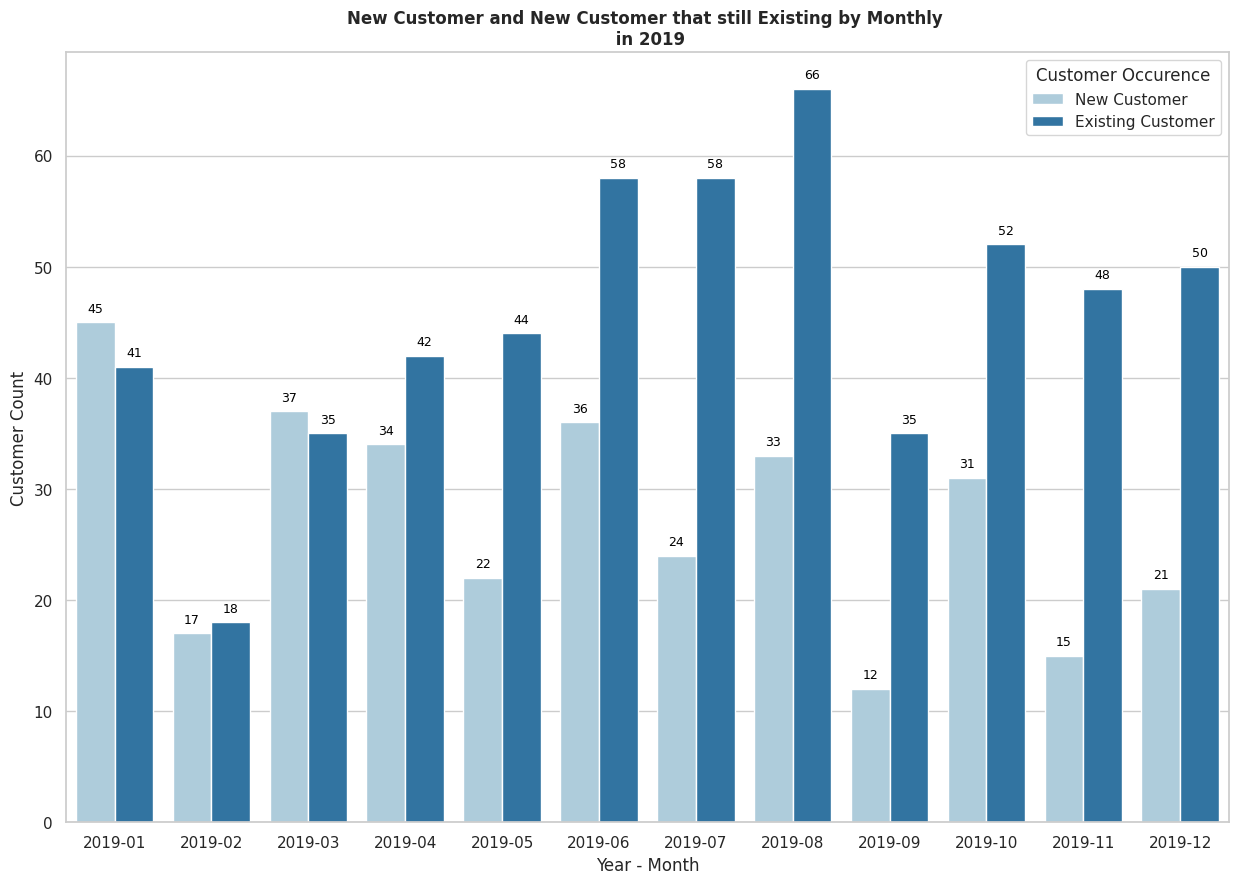

In [ ]:
#create grouped_new_cust to create bar chart
grouped_new_cust = df_new_cust.groupby(['month','cust_occurence']).agg(customer_cnt=('customerid','nunique')).reset_index()

# Create a Bar Chart to show New Customer and New Customer Existing Monthly
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

fig = sns.barplot(x='month',
                  y='customer_cnt', hue='cust_occurence',
                  data = grouped_new_cust.sort_values(by=['month','cust_occurence'], ascending=[True,False]),
                  palette='Paired')

plt.legend(title='Customer Occurence')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

# Adding labels and a title
plt.xlabel('Year - Month')
plt.ylabel('Customer Count')
plt.title('New Customer and New Customer that still Existing by Monthly \n in 2019', fontweight='bold', fontsize = 12)

# Show the chart
plt.show()

In [ ]:
#create existing_new_cust to create bar chart
existing_new_cust = df_new_cust.groupby(['cust_occurence']).agg(customer_cnt=('customerid','nunique')).reset_index()
existing_new_cust

,cust_occurence,customer_cnt
0,Existing Customer,311
1,New Customer,327


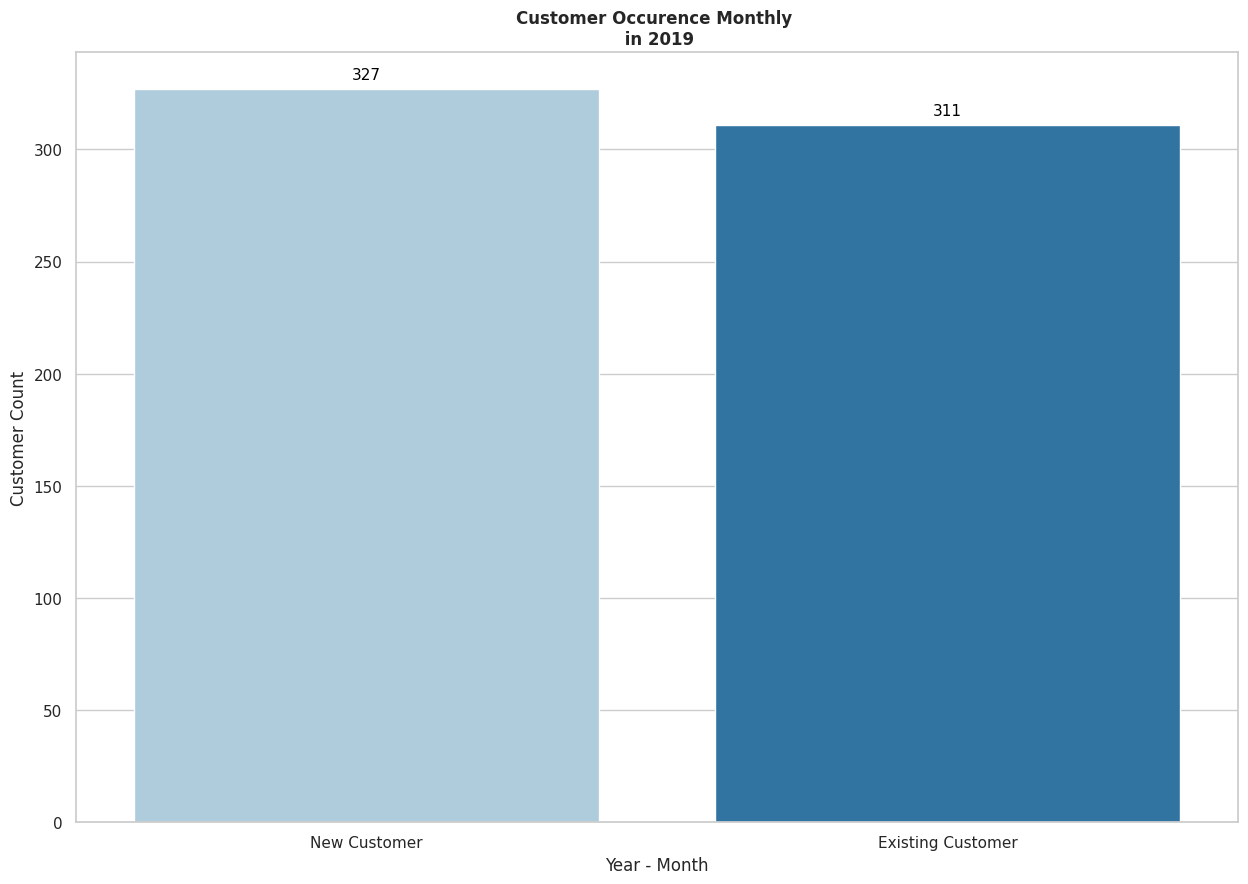

In [ ]:
# Create a Bar Chart to show New Customer and New Customer Existing Monthly
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
fig = sns.barplot(x='cust_occurence',
                  y='customer_cnt',
                  data = existing_new_cust.sort_values(by=['cust_occurence'], ascending=False),
                  palette='Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# Adding labels and a title
plt.xlabel('Year - Month')
plt.ylabel('Customer Count')
plt.title('Customer Occurence Monthly \n in 2019', fontweight='bold', fontsize = 12)

# Show the chart
plt.show()

In [ ]:
# #Data Visualization New Customer
# plt.figure(figsize=(15,8))
# fig = sns.countplot(x='month', data = df_new_cust, hue = 'cust_occurence', palette = 'Paired')

# # Change the legend names
# legend_labels = ['New Customer', 'Existing Customer']  # New legend labels
# plt.legend(title='Customer Occurence', labels=legend_labels)

# # Add labels to the bars
# ax = fig.axes
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

# plt.title('New and Existing of New Customer in 2019', fontweight='bold', fontsize= 14, color='black')
# plt.xlabel('\nYear - Month', fontweight ='bold',fontsize=10)
# plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)

### **b. Retention Rate of Customer on MoM basis**


In [ ]:
#create existing_cust
# create df_existing_cust from df_online_sales
df_existing_cust = df_online_sales.copy()

df_existing_cust = df_existing_cust.merge(df_customer, how='left', on='customerid')

df_existing_cust.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12


In [ ]:
#create additional column
df_existing_cust['month'] = pd.to_datetime(df_existing_cust['transaction_date']).dt.to_period('M')
df_existing_cust.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gender,location,tenure_months,month
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,2019-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,2019-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee Black,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,2019-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,2019-01


In [ ]:
#get value of existing customers by Year Month
exst_new_cust_daily = df_existing_cust.groupby(['month','transaction_date']).agg(existing_customer=('customerid','nunique')).reset_index()
exst_new_cust_daily = exst_new_cust_daily.merge(acq_cust_daily, how='left', on=['transaction_date']).fillna(0)
exst_new_cust_daily['new_customer'] = exst_new_cust_daily['new_customer'].astype(int)

exst_new_cust_daily

In [ ]:
# Determine Retention Rate on MoM basis
rr_cust = exst_new_cust_daily.groupby('month').agg(fm_cust=('existing_customer','first'),
                                                 lm_cust=('existing_customer','last'),
                                                 new_cust = ('new_customer','sum')).reset_index()
rr_cust['retention_rate'] = round(((rr_cust['lm_cust'] - rr_cust['fm_cust'])/rr_cust['new_cust'])*100,2)
rr_cust

In [ ]:
# Create a Bar Chart to show Retention Value Monthly
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
fig = sns.barplot(x='month', y='retention_rate', data=rr_cust, palette='Paired')

# Adding labels with percentage symbols
for p in fig.patches:
    height = p.get_height()
    fig.annotate(f'{height}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black',fontweight='bold')

# Adding labels and a title
plt.xlabel('Year - Month')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate Monthly \n in 2019', fontweight='bold', fontsize = 12)

# Show the chart
plt.show()

### **c. How are the different between Revenue by New Customer and Revenue by Existing Customer?**


In [ ]:
#merge df_trx and df_customer
df_trx = df_trx.merge(df_customer[['customerid','tenure_months']], how='left', on='customerid')
df_trx['month'] = pd.to_datetime(df_trx['transaction_date']).dt.to_period('M')
df_trx.head()

In [ ]:
#classify New Customer and Existing Customer
df_trx['cust_occurence'] = df_trx['tenure_months'].apply(lambda x:'New Customer' if x<=12 else 'Existing Customer')
df_trx.head()

In [ ]:
#Revenue Month on Month Basis in 2019
df_trx.groupby(by=['month']).agg(revenue=('revenue','sum')).reset_index()

In [ ]:
#Revenue Summary during 2019
revenue_trx_group = df_trx.groupby(by=['cust_occurence']).agg(cust_cnt=('customerid','nunique'),
                                                              revenue=('revenue','sum')).reset_index()
revenue_trx_group['revenue_per_cust'] = revenue_trx_group['revenue'] / revenue_trx_group['cust_cnt']
revenue_trx_group.style.background_gradient(cmap='BuGn')

In [ ]:
#Revenue Contributed by Existing and New Customer during 2019 (Breakdown from Revenue Summary)
revenue_trx_group = df_trx.groupby(by=['month','cust_occurence']).agg(cust_cnt=('customerid','nunique'),
                                                              revenue=('revenue','sum')).reset_index()
revenue_trx_group['revenue_per_cust'] = revenue_trx_group['revenue'] / revenue_trx_group['cust_cnt']
revenue_trx_group.style.background_gradient(cmap='BuGn')

In [ ]:
#find the highest Revenue contributed by each New Customer in 2019-02
highest_rpc = df_trx[(df_trx['month']=='2019-02') & (df_trx['cust_occurence']=='New Customer')].sort_values(by=['customerid','transaction_date'], ascending=True).reset_index(drop=True)
highest_rpc = highest_rpc.groupby(by=['month','customerid']).agg(purchase_freq=('transaction_id','nunique'),
                                                                 qty=('quantity','sum'),
                                                                 revenue=('revenue','sum')).sort_values('revenue', ascending=False).reset_index()
highest_rpc['qty_per_transaction'] = round(highest_rpc['qty']/highest_rpc['purchase_freq'],2)
highest_rpc['revenue_per_qty'] = round(highest_rpc['revenue']/highest_rpc['qty'],2)
highest_rpc['revenue_per_transaction'] = round(highest_rpc['revenue']/highest_rpc['purchase_freq'],2)
highest_rpc

In [ ]:
#find customerid 15808
df_trx[df_trx['customerid']=='15808'].reset_index(drop=True)

In [ ]:
# Create a Bar Chart to visualized New Customer vs Existing Customer on MoM basis based on Revenue
plt.figure(figsize=(20, 10))  # Adjust the figure size if needed
fig = sns.barplot(x='month',
                  y='revenue', hue='cust_occurence',
                  data = revenue_trx_group.sort_values(by=['month','cust_occurence'], ascending=[True,False]),
                  palette='Paired',
                  ci=None)

plt.legend(title='Customer Occurence', loc='upper left',bbox_to_anchor=(1.0, 1.0))

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'$ {round(float(p.get_height()),1)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

# Adding labels and a title
plt.xlabel('Year - Month')
plt.ylabel('Revenue')
plt.title('Revenue: New Customer vs Existing Customer \n in Jan - Dec 2019', fontweight='bold', fontsize = 12)

# Show the chart
plt.show()

### **d. How the discounts playing role in the revenues?**


In [ ]:
#create df_disc from df_online_sales
df_disc = df_online_sales.copy()

df_disc['month'] = df_disc['transaction_date'].dt.strftime('%b')
df_disc['year_month'] = df_disc['transaction_date'].dt.to_period('M')
df_disc['revenue'] = df_disc['quantity'] * df_disc['avg_price']

df_disc = df_disc.merge(df_customer, how='left', on='customerid')
df_disc = df_disc.merge(df_disc_coupon, how='left', on=['month','product_category'])
df_disc = df_disc.merge(df_tax_amt, how='left',on='product_category')

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_disc['final_disc'] = df_disc['coupon_status'].apply(cocokin_diskon)
df_disc['discount_pct'] = df_disc['discount_pct']*df_disc['final_disc']
df_disc = df_disc.drop(columns='final_disc')

#fill the null values
df_disc['coupon_code'] = df_disc['coupon_code'].fillna('NO DISCOUNT')
df_disc['discount_pct'] = df_disc['discount_pct'] .fillna(0)

#determine the revenue
df_disc['revenue'] = round(((df_disc['quantity']*df_disc['avg_price'])*(1-(df_disc['discount_pct']/100))*(1 + df_disc['gst'])) + df_disc['delivery_charges'],2)

df_disc.head()

In [ ]:
#inspect df_disc
df_disc.info()

In [ ]:
#create disc_revenue, convert_disc_revenue and no_disc_revenue
convert_disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT') & (df_disc['coupon_status']=='Used')].groupby('year_month').agg(revenue_convert_disc=('revenue','sum'),cust_convert_disc=('customerid','nunique')).reset_index()
disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT')].groupby('year_month').agg(revenue_disc=('revenue','sum'),cust_number_disc=('customerid','nunique')).reset_index()
no_disc_revenue = df_disc[(df_disc['coupon_code']=='NO DISCOUNT')].groupby('year_month').agg(revenue_no_disc=('revenue','sum'),cust_number_no_disc=('customerid','nunique')).reset_index()

#create disc_effective
disc_effective = disc_revenue.merge(convert_disc_revenue, how='left',on='year_month').fillna(0)
disc_effective = disc_effective.merge(no_disc_revenue, how='left', on='year_month').reset_index(drop=True).fillna(0)
disc_effective[['cust_number_disc','cust_number_no_disc']] = disc_effective[['cust_number_disc','cust_number_no_disc']].astype(int)

#Determine Discount Effectiveness with Discount Conversion Rate (DCR) dan Discount Revenue Ratio (DRR) on MoM basis
disc_effective['dcr'] = round(((disc_effective['cust_convert_disc'] / disc_effective['cust_number_disc']).fillna(0))*100,2)
disc_effective['drr_pct'] = round((disc_effective['revenue_convert_disc']/(disc_effective['revenue_disc'] + disc_effective['revenue_convert_disc'] + disc_effective['revenue_no_disc'])) * 100,2)

disc_effective.reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
melted_df = disc_effective[['year_month','cust_number_disc','cust_convert_disc']].melt(id_vars=['year_month'], var_name='Customer Status', value_name='Customer Count')

#Create Bar Chart to Visualized Customer that Claimed Discount vs Total Customer that Got Discount
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.set_context('paper', font_scale=1)


fig = sns.barplot(x='year_month', y='Customer Count', hue='Customer Status', data=melted_df, palette='BuGn', ci=None)
plt.title('Total Customers who Get Discounts vs Customer that Claimed the Discounts\n in Jan - Dec 2019\n', fontweight='bold', fontsize='15')
plt.xlabel('Year - Month')
plt.ylabel('Customer Count')

#Set Custom Labels for Legend
custom_labels = ['Customer Who Get Discount','Customer That Claimed the Discount']

# Set the custom legend labels
fig.legend(custom_labels,title='Customer Discount Conversion', loc='upper right',bbox_to_anchor=(1.0, 1.0))

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{round(int(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
melted_df = disc_effective[['year_month','revenue_disc','revenue_convert_disc']].melt(id_vars=['year_month'], var_name='Revenue Status', value_name='Total Revenue')

#Create Bar Chart to Visualized Revenue from Discount vs Non Discount Revenue
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.set_context('paper', font_scale=1)


fig = sns.barplot(x='year_month', y='Total Revenue', hue='Revenue Status', data=melted_df, palette='BuGn', ci=None)
plt.title('Discounted Revenue vs Non Discount Revenue\n in Jan - Dec 2019\n', fontweight='bold', fontsize='15')
plt.xlabel('Year - Month')
plt.ylabel('Total Revenue')

#Set Custom Labels for Legend
custom_labels = ['Revenue from Discount','Non Discount Revenue']

# Set the custom legend labels
fig.legend(custom_labels,title='Revenue Status', loc='upper left',bbox_to_anchor=(1.0, 1.0))

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'$ {round(int(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#create disc_revenue, convert_disc_revenue and no_disc_revenue
convert_disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT') & (df_disc['coupon_status']=='Used')].groupby('product_category').agg(revenue_convert_disc=('revenue','sum'),cust_convert_disc=('customerid','nunique')).reset_index()
disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT')].groupby('product_category').agg(revenue_disc=('revenue','sum'),cust_number_disc=('customerid','nunique')).reset_index()
no_disc_revenue = df_disc[(df_disc['coupon_code']=='NO DISCOUNT')].groupby('product_category').agg(revenue_no_disc=('revenue','sum'),cust_number_no_disc=('customerid','nunique')).reset_index()

#create disc_effective
disc_effective = disc_revenue.merge(convert_disc_revenue, how='outer',on='product_category').fillna(0)
disc_effective = disc_effective.merge(no_disc_revenue, how='outer', on='product_category').reset_index(drop=True).fillna(0)
disc_effective[['cust_number_disc','cust_number_no_disc','cust_convert_disc']] = disc_effective[['cust_number_disc','cust_number_no_disc','cust_convert_disc']].astype(int)

#Determine Discount Effectiveness with Discount Conversion Rate (DCR) dan Discount Revenue Ratio (DRR) by Product Category
disc_effective['dcr'] = round(((disc_effective['cust_convert_disc'] / disc_effective['cust_number_disc']).fillna(0))*100,2)
disc_effective['drr_pct'] = round((disc_effective['revenue_convert_disc']/(disc_effective['revenue_disc'] + disc_effective['revenue_convert_disc'] + disc_effective['revenue_no_disc'])) * 100,2)

disc_effective.sort_values(by=['dcr','drr_pct'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
cust_melted_df = disc_effective[['product_category','cust_number_disc','cust_convert_disc']][disc_effective['cust_number_disc']!=0].melt(id_vars=['product_category'], var_name='Customer Status', value_name='Customer Count')

#Create Bar Chart to Visualized Customer that Claimed Discount vs Total Customer that Got Discount
sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.set_context('paper', font_scale=1)


fig = sns.barplot(x='product_category', y='Customer Count', hue='Customer Status', data=cust_melted_df, palette='BuGn', ci=None)
plt.title('Total Customers who Get Discounts vs Customer that Claimed the Discounts\n in Jan - Dec 2019\n', fontweight='bold', fontsize='15')
plt.xlabel('Product Category')
plt.ylabel('Customer Count')

#Set Custom Labels for Legend
custom_labels = ['Customer Who Get Discount','Customer That Claimed the Discount']

# Set the custom legend labels
fig.legend(custom_labels,title='Customer Discount Conversion', loc='upper left',bbox_to_anchor=(1.0, 1.0))

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{round(int(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
revenue_melted_df = disc_effective[['product_category','revenue_disc','revenue_convert_disc']].sort_values('revenue_convert_disc', ascending=False).head(5).melt(id_vars=['product_category'], var_name='Revenue Status', value_name='Total Revenue')

#Create Bar Chart to Visualized Revenue from Discount vs Non Discount Revenue by Product Category
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.set_context('paper', font_scale=1)


fig = sns.barplot(x='product_category', y='Total Revenue', hue='Revenue Status', data=revenue_melted_df, palette='BuGn', ci=None)
plt.title('Discounted Revenue vs Non Discount Revenue by Product Category\n in Jan - Dec 2019\n', fontweight='bold', fontsize='15')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

#Set Custom Labels for Legend
custom_labels = ['Revenue from Discount','Non Discount Revenue']

# Set the custom legend labels
fig.legend(custom_labels,title='Revenue Status', loc='upper left',bbox_to_anchor=(1.0, 1.0))

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'$ {round(int(p.get_height()),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#create disc_revenue, convert_disc_revenue and no_disc_revenue
convert_disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT') & (df_disc['coupon_status']=='Used')].groupby(['product_category','product_description']).agg(revenue_convert_disc=('revenue','sum'),cust_convert_disc=('customerid','nunique')).reset_index()
disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT')].groupby(['product_category','product_description']).agg(revenue_disc=('revenue','sum'),cust_number_disc=('customerid','nunique')).reset_index()
no_disc_revenue = df_disc[(df_disc['coupon_code']=='NO DISCOUNT')].groupby(['product_category','product_description']).agg(revenue_no_disc=('revenue','sum'),cust_number_no_disc=('customerid','nunique')).reset_index()

#create disc_effective
disc_effective = disc_revenue.merge(convert_disc_revenue, how='outer',on=['product_category','product_description']).fillna(0)
disc_effective = disc_effective.merge(no_disc_revenue, how='outer', on=['product_category','product_description']).reset_index(drop=True).fillna(0)
disc_effective[['cust_number_disc','cust_number_no_disc','cust_convert_disc']] = disc_effective[['cust_number_disc','cust_number_no_disc','cust_convert_disc']].astype(int)

#Determine Discount Effectiveness with Discount Conversion Rate (DCR) dan Discount Revenue Ratio (DRR) by Product Category and Product Description
disc_effective['dcr'] = round(((disc_effective['cust_convert_disc'] / disc_effective['cust_number_disc']).fillna(0))*100,2)
disc_effective['drr_pct'] = round((disc_effective['revenue_convert_disc']/(disc_effective['revenue_disc'] + disc_effective['revenue_convert_disc'] + disc_effective['revenue_no_disc'])) * 100,2)

disc_effective.sort_values(by=['product_category','dcr','drr_pct'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
#create disc_revenue, convert_disc_revenue and no_disc_revenue
convert_disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT') & (df_disc['coupon_status']=='Used')].groupby(['location']).agg(revenue_convert_disc=('revenue','sum'),cust_convert_disc=('customerid','nunique')).reset_index()
disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT')].groupby(['location']).agg(revenue_disc=('revenue','sum'),cust_number_disc=('customerid','nunique')).reset_index()
no_disc_revenue = df_disc[(df_disc['coupon_code']=='NO DISCOUNT')].groupby(['location']).agg(revenue_no_disc=('revenue','sum'),cust_number_no_disc=('customerid','nunique')).reset_index()

#create disc_effective
disc_effective = disc_revenue.merge(convert_disc_revenue, how='outer',on=['location']).fillna(0)
disc_effective = disc_effective.merge(no_disc_revenue, how='outer', on=['location']).reset_index(drop=True).fillna(0)
disc_effective[['cust_number_disc','cust_number_no_disc','cust_convert_disc']] = disc_effective[['cust_number_disc','cust_number_no_disc','cust_convert_disc']].astype(int)

#Determine Discount Effectiveness with Discount Conversion Rate (DCR) dan Discount Revenue Ratio (DRR) by Location
disc_effective['dcr'] = round(((disc_effective['cust_convert_disc']/ disc_effective['cust_number_disc']).fillna(0))*100,2)
disc_effective['drr_pct'] = round((disc_effective['revenue_convert_disc']/(disc_effective['revenue_disc'] + disc_effective['revenue_convert_disc'] + disc_effective['revenue_no_disc'])) * 100,2)

disc_effective.sort_values(by=['dcr','drr_pct'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
#create disc_revenue, convert_disc_revenue and no_disc_revenue
convert_disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT') & (df_disc['coupon_status']=='Used')].groupby('year_month').agg(revenue_convert_disc=('revenue','sum'),cust_convert_disc=('customerid','nunique')).reset_index()
disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT')].groupby('year_month').agg(revenue_disc=('revenue','sum'),cust_number_disc=('customerid','nunique')).reset_index()
no_disc_revenue = df_disc[(df_disc['coupon_code']=='NO DISCOUNT')].groupby('year_month').agg(revenue_no_disc=('revenue','sum'),cust_number_no_disc=('customerid','nunique')).reset_index()


#create disc_effective
disc_effective = disc_revenue.merge(convert_disc_revenue, how='left',on='year_month').fillna(0)
disc_effective = disc_effective.merge(no_disc_revenue, how='left', on='year_month').reset_index(drop=True).fillna(0)
disc_effective[['cust_number_disc','cust_number_no_disc']] = disc_effective[['cust_number_disc','cust_number_no_disc']].astype(int)


#Determine Discount Effectiveness with Discount Conversion Rate (DCR) dan Discount Revenue Ratio (DRR) by Location
disc_effective['dcr'] = round(((disc_effective['cust_convert_disc']/ disc_effective['cust_number_disc']).fillna(0))*100,2)
disc_effective['drr_pct'] = round((disc_effective['revenue_convert_disc']/(disc_effective['revenue_disc'] + disc_effective['revenue_convert_disc'] + disc_effective['revenue_no_disc'])) * 100,2)


#merge with disc_effective
disc_eff = disc_effective.merge(rr_cust,how='left',left_on='year_month',right_on='month')
disc_eff = disc_eff[['month', 'fm_cust', 'lm_cust', 'new_cust',
                     'revenue_disc', 'cust_number_disc',
                     'revenue_convert_disc', 'cust_convert_disc', 'revenue_no_disc',
                     'cust_number_no_disc','retention_rate', 'dcr', 'drr_pct']]
disc_eff.reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
#grouped the data with aggregate function to get total revenue by coupon_status
trx_disc = df_disc.groupby(['coupon_status']).agg(trx_count = ('transaction_id','count'),
                                                  cust_trx = ('customerid','nunique'),
                                                  qty = ('quantity','sum'),
                                                  revenue = ('revenue','sum')).reset_index()

# trx_disc.set_index('coupon_status', inplace=True)
# trx_disc.index.name=None

trx_disc['revenue_pct'] = round(100 * trx_disc['revenue'] / trx_disc['revenue'].sum(),2)
trx_disc

In [ ]:
#create pie chart to visualized the role of discount campaign
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Clicked','Not Used','Used']
disc = trx_disc['revenue']/trx_disc['revenue'].sum()
ax.pie(disc, labels=labels, autopct= '%.2f%%')
plt.title(label = 'The Role of Discount Campaign \n by Sales Revenue - 2019',
          size = 11,
          fontweight = 'bold',
          color = 'black')
plt.show()

In [ ]:
#find the correlation betweem discount and quantity
correlation_matrix = df_trx[['quantity','discount_pct']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.title('Correlation: Quantity vs Discount \n Jan - Dec 2019', fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)

# Show the plot
plt.show()

### **e. Analyse KPI’s: Revenue, Number of Orders, Average Order Value (AOV), Average Revenue per User (ARPU),Average Selling Price (ASP),Basket Size, Number of Customers (existing/new), Sales Quantity - Daily, Weekly, Monthly**

In [ ]:
df_trx[df_trx['avg_price']>100].groupby('month').agg(revenue=('revenue','sum'),
                                                     order_cnt=('transaction_id','nunique'),
                                                     quantity=('quantity','sum'),
                                                     avg_price=('avg_price','mean')).sort_values('month').reset_index().style.background_gradient(cmap='BuGn')

In [ ]:
#create df_kpi to create KPI Analysis
df_kpi = df_trx.copy()
df_kpi = df_kpi[['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'gst', 'month', 'coupon_code',
       'discount_pct', 'revenue', 'cust_occurence']]
df_kpi = df_kpi.merge(df_customer, how='left', on='customerid')
df_kpi['week'] = df_kpi['transaction_date'].dt.isocalendar().week
df_kpi.head()

In [ ]:
#KPI Analysis Daily
kpi_daily = df_kpi.groupby(['transaction_date']).agg(order_number=('transaction_id','nunique'),
                                                    cust_number=('customerid','nunique'),
                                                    sold_qty = ('quantity','sum'),
                                                    revenue = ('revenue','sum')).reset_index()

kpi_daily['aov'] = kpi_daily['revenue'] / kpi_daily['order_number']
kpi_daily['arpu'] = kpi_daily['revenue'] / kpi_daily['cust_number']
kpi_daily['asp'] = kpi_daily['revenue'] / kpi_daily['sold_qty']
kpi_daily['basket_size'] = kpi_daily['sold_qty'] / kpi_daily['order_number']
kpi_daily['transaction_date'] = pd.to_datetime(kpi_daily['transaction_date']).dt.to_period('D')
kpi_daily[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_daily[['aov', 'arpu', 'asp', 'basket_size']],2)

kpi_daily.style.background_gradient(cmap='GnBu')

In [ ]:
#KPI Analysis Weekly
kpi_weekly = df_kpi.groupby(['week']).agg(order_number=('transaction_id','nunique'),
                                          cust_number=('customerid','nunique'),
                                          sold_qty = ('quantity','sum'),
                                          revenue = ('revenue','sum')).reset_index()

kpi_weekly['aov'] = kpi_weekly['revenue'] / kpi_weekly['order_number']
kpi_weekly['arpu'] = kpi_weekly['revenue'] / kpi_weekly['cust_number']
kpi_weekly['asp'] = kpi_weekly['revenue'] / kpi_weekly['sold_qty']
kpi_weekly['basket_size'] = kpi_weekly['sold_qty'] / kpi_weekly['order_number']
kpi_weekly[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_weekly[['aov', 'arpu', 'asp', 'basket_size']],2)
kpi_weekly['week'] = 'W'+' '+ kpi_weekly['week'].astype(str)

kpi_weekly.style.background_gradient(cmap='GnBu')

In [ ]:
#KPI Analysis monthly
kpi_monthly = df_kpi.groupby(['month']).agg(order_number=('transaction_id','nunique'),
                                          cust_number=('customerid','nunique'),
                                          sold_qty = ('quantity','sum'),
                                          revenue = ('revenue','sum')).reset_index()

kpi_monthly['aov'] = kpi_monthly['revenue'] / kpi_monthly['order_number']
kpi_monthly['arpu'] = kpi_monthly['revenue'] / kpi_monthly['cust_number']
kpi_monthly['asp'] = kpi_monthly['revenue'] / kpi_monthly['sold_qty']
kpi_monthly['basket_size'] = kpi_monthly['sold_qty'] / kpi_monthly['order_number']
kpi_monthly[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_monthly[['aov', 'arpu', 'asp', 'basket_size']],2)

kpi_monthly.style.background_gradient(cmap='GnBu')

In [ ]:
#check: Why ARPU in trxruary is the highest?
check_trx = df_trx[['month','product_description','product_category','avg_price','quantity','revenue','customerid']].groupby(by=['month','product_category','product_description','avg_price'])\
.agg(quantity=('quantity','sum'),
     revenue=('revenue','sum'),
     cust_number=('customerid','nunique'))\
     .sort_values(by=['month','avg_price'],ascending=[True, False]).drop_duplicates().reset_index()

In [ ]:
check_trx.info()

In [ ]:
check_trx.style.background_gradient(cmap='BuGn')

In [ ]:

check_trx[check_trx['avg_price']>=100].style.background_gradient(cmap='BuGn')

In [ ]:
#check: Why ARPU in trxruary is the highest?
def categorize_price(x):
  if x >= 100:
    return 'More Than $100'
  else:
    return 'Less Than $100'

check_trx['price_category'] = check_trx['avg_price'].apply(categorize_price)
check_trx = check_trx.groupby(by=['month','price_category']).agg(cust_number=('cust_number','sum'),
                                        qty=('quantity','sum'),
                                        avg_price=('avg_price','mean')).reset_index()
check_trx['revenue'] = check_trx['qty'] * check_trx['avg_price']
check_trx['arpu'] = check_trx['revenue'] / check_trx['cust_number']

check_trx.style.background_gradient(cmap='BuGn')

In [ ]:
mt100 = check_trx[check_trx['price_category']=='More Than $100']
mt100.style.background_gradient(cmap='BuGn')

In [ ]:
lt100 = check_trx[check_trx['price_category']=='Less Than $100']
lt100.style.background_gradient(cmap='BuGn')

In [ ]:
#Create Bar Chart to Visualized KPI Analysis Monthly
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

#Give Title
fig.suptitle('Revenue Analysis by KPI Monthly\n',color = 'black', fontweight= 'bold',fontsize = 15)


# Plot a bar chart for AOV
sns.barplot(x='month', y='aov', data=kpi_monthly, palette='Paired', ax=axes[0, 0])
axes[0][0].set_title('\n\nAverage Order Value (AOV)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[0, 0].patches:
    height = bar.get_height()
    axes[0, 0].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for ARPU
sns.barplot(x='month', y='arpu', data=kpi_monthly, palette='Paired', ax=axes[0, 1])
axes[0][1].set_title('\n\nAverage Revenue per User (ARPU)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[0, 1].patches:
    height = bar.get_height()
    axes[0, 1].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for ASP
sns.barplot(x='month', y='asp', data=kpi_monthly, palette='Paired', ax=axes[1, 0])
axes[1][0].set_title('\n\nAverage Sales Price (ASP)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[1, 0].patches:
    height = bar.get_height()
    axes[1, 0].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for Basket Size
sns.barplot(x='month', y='basket_size', data=kpi_monthly, palette='Paired', ax=axes[1, 1])
axes[1][1].set_title('\n\nBasket Size\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[1, 1].patches:
    height = bar.get_height()
    axes[1, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')



# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
#KPI Analysis by Category
kpi_category = df_kpi.groupby(['product_category']).agg(order_number=('transaction_id','nunique'),
                                          cust_number=('customerid','nunique'),
                                          sold_qty = ('quantity','sum'),
                                          revenue = ('revenue','sum')).sort_values('product_category').reset_index()

kpi_category['aov'] = kpi_category['revenue'] / kpi_category['order_number']
kpi_category['arpu'] = kpi_category['revenue'] / kpi_category['cust_number']
kpi_category['asp'] = kpi_category['revenue'] / kpi_category['sold_qty']
kpi_category['basket_size'] = kpi_category['sold_qty'] / kpi_category['order_number']
kpi_category[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_category[['aov', 'arpu', 'asp', 'basket_size']],2)

kpi_category.sort_values(by=['revenue','aov','arpu','asp','basket_size'], ascending=False).reset_index(drop=True).head(10).style.background_gradient(cmap='GnBu')

In [ ]:
#Create Bar Chart to Visualized KPI Analysis by Category
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(25, 20))

#Give Title
fig.suptitle('Revenue Analysis by KPI (Product Category)\n',color = 'black', fontweight= 'bold',fontsize = 15)


# Plot a bar chart for AOV
sns.barplot(x='product_category', y='aov', data=kpi_category.sort_values('aov', ascending=False).head(10), palette='inferno', ax=axes[0, 0])
axes[0][0].set_title('\n\nAverage Order Value (AOV)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[0, 0].patches:
    height = bar.get_height()
    axes[0, 0].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for ARPU
sns.barplot(x='product_category', y='arpu', data=kpi_category.sort_values('arpu', ascending=False).head(10), palette='inferno', ax=axes[0, 1])
axes[0][1].set_title('\n\nAverage Revenue per User (ARPU)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[0, 1].patches:
    height = bar.get_height()
    axes[0, 1].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for ASP
sns.barplot(x='product_category', y='asp', data=kpi_category.sort_values('asp', ascending=False).head(10), palette='inferno', ax=axes[1, 0])
axes[1][0].set_title('\n\nAverage Selling Price (ASP)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[1, 0].patches:
    height = bar.get_height()
    axes[1, 0].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for Basket Size
sns.barplot(x='product_category', y='basket_size', data=kpi_category.sort_values('basket_size', ascending=False).head(10), palette='inferno', ax=axes[1, 1])
axes[1][1].set_title('\n\nBasket Size\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[1, 1].patches:
    height = bar.get_height()
    axes[1, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')



# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
#KPI Analysis by Discount
kpi_discount = df_kpi.groupby(['month','product_category','product_description','coupon_code']).agg(order_number=('transaction_id','nunique'),
                                          cust_number=('customerid','nunique'),
                                          sold_qty = ('quantity','sum'),
                                          revenue = ('revenue','sum')).sort_values(by=['product_category','product_description','coupon_code','month']).reset_index()

kpi_discount['aov'] = kpi_discount['revenue'] / kpi_discount['order_number']
kpi_discount['arpu'] = kpi_discount['revenue'] / kpi_discount['cust_number']
kpi_discount['asp'] = kpi_discount['revenue'] / kpi_discount['sold_qty']
kpi_discount['basket_size'] = kpi_discount['sold_qty'] / kpi_discount['order_number']
kpi_discount[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_discount[['aov', 'arpu', 'asp', 'basket_size']],2)

kpi_discount.sort_values(by=['product_category','revenue','aov','arpu','asp','basket_size'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='GnBu')

In [ ]:
#KPI Analysis by Location
kpi_location = df_kpi.groupby(['location']).agg(order_number=('transaction_id','nunique'),
                                          cust_number=('customerid','nunique'),
                                          sold_qty = ('quantity','sum'),
                                          revenue = ('revenue','sum')).sort_values(by=['location']).reset_index()

kpi_location['aov'] = kpi_location['revenue'] / kpi_location['order_number']
kpi_location['arpu'] = kpi_location['revenue'] / kpi_location['cust_number']
kpi_location['asp'] = kpi_location['revenue'] / kpi_location['sold_qty']
kpi_location['basket_size'] = kpi_location['sold_qty'] / kpi_location['order_number']
kpi_location[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_location[['aov', 'arpu', 'asp', 'basket_size']],2)

kpi_location.sort_values(by=['revenue','aov','arpu','asp','basket_size'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='GnBu')

In [ ]:
#Create Bar Chart to Visualized KPI Analysis by Location
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

#Give Title
fig.suptitle('Revenue Analysis by KPI (Location)\n',color = 'black', fontweight= 'bold',fontsize = 15)


# Plot a bar chart for AOV
sns.barplot(x='location', y='aov', data=kpi_location.sort_values('aov', ascending=False), palette='inferno', ax=axes[0, 0])
axes[0][0].set_title('\n\nAverage Order Value (AOV)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[0, 0].patches:
    height = bar.get_height()
    axes[0, 0].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for ARPU
sns.barplot(x='location', y='arpu', data=kpi_location.sort_values('arpu', ascending=False), palette='inferno', ax=axes[0, 1])
axes[0][1].set_title('\n\nAverage Revenue per User (ARPU)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[0, 1].patches:
    height = bar.get_height()
    axes[0, 1].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for ASP
sns.barplot(x='location', y='asp', data=kpi_location.sort_values('asp', ascending=False), palette='inferno', ax=axes[1, 0])
axes[1][0].set_title('\n\nAverage Selling Price (ASP)\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[1, 0].patches:
    height = bar.get_height()
    axes[1, 0].annotate(f'$ {height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')


# Plot a bar chart for Basket Size
sns.barplot(x='location', y='basket_size', data=kpi_location.sort_values('basket_size', ascending=False), palette='inferno', ax=axes[1, 1])
axes[1][1].set_title('\n\nBasket Size\n', fontweight='bold', fontsize=11, color='black')
# Add data labels to the AOV bar chart
for bar in axes[1, 1].patches:
    height = bar.get_height()
    axes[1, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')



# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
#KPI Analysis by Gender
kpi_gender = df_kpi.groupby(['gender']).agg(order_number=('transaction_id','nunique'),
                                          cust_number=('customerid','nunique'),
                                          sold_qty = ('quantity','sum'),
                                          revenue = ('revenue','sum')).sort_values(by=['gender'], ascending=False).reset_index()

kpi_gender['aov'] = kpi_gender['revenue'] / kpi_gender['order_number']
kpi_gender['arpu'] = kpi_gender['revenue'] / kpi_gender['cust_number']
kpi_gender['asp'] = kpi_gender['revenue'] / kpi_gender['sold_qty']
kpi_gender['basket_size'] = kpi_gender['sold_qty'] / kpi_gender['order_number']
kpi_gender[['aov', 'arpu', 'asp', 'basket_size']] = round(kpi_gender[['aov', 'arpu', 'asp', 'basket_size']],2)

kpi_gender.sort_values(by=['revenue','aov','arpu','asp','basket_size'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='GnBu')

### **f. The trends/seasonality of sales by Category, Location, Revenue and Quantity, and Transaction by Month**

In [ ]:
#create df_season_trend
df_season_trend = df_online_sales.copy()
df_discount = df_disc_coupon.copy()

df_season_trend['month'] = pd.to_datetime(df_season_trend['transaction_date']).dt.to_period('M')
df_season_trend.info()

In [ ]:
df_discount.head()

In [ ]:
#merge df_season_trend and df_tax_amt
df_season_trend = df_season_trend.merge(df_tax_amt, how='left',on='product_category')
df_season_trend = df_season_trend.merge(df_customer, how='left',on='customerid')

#merge df_daily_trend and df_discount
# Mapping function
def convert_to_year_month(month):
    return f'2019-{datetime.strptime(month, "%b").month:02d}'

# Applying the function to the 'Month' column
df_discount['month'] = df_discount['month'].apply(convert_to_year_month)
df_discount['month'] = pd.to_datetime(df_discount['month']).dt.to_period('M')
df_season_trend = df_season_trend.merge(df_discount, how='left', on=['month','product_category'])
df_season_trend['coupon_code'] = df_season_trend['coupon_code'].fillna('NO DISCOUNT')
df_season_trend['discount_pct'] = df_season_trend['discount_pct'].fillna(0)

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_season_trend['final_disc'] = df_season_trend['coupon_status'].apply(cocokin_diskon)
df_season_trend['discount_pct'] = df_season_trend['discount_pct']*df_season_trend['final_disc']
df_season_trend = df_season_trend.drop(columns='final_disc')

df_season_trend['revenue'] = round(((df_season_trend['quantity']*df_season_trend['avg_price'])*(1-(df_season_trend['discount_pct']/100))*(1 + df_season_trend['gst'])) + df_season_trend['delivery_charges'],2)
df_season_trend.head()

In [ ]:
#Trend of Transaction by Month by Transaction ID
df_trx_month = df_season_trend.groupby('month').agg(transaction_count = ('transaction_id','nunique')).reset_index()
df_trx_month['month'] = df_trx_month['month'].astype(str)

# Set seaborn style
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(15, 9))
plt.grid(False)
fig = sns.lineplot(x='month', y='transaction_count', data=df_trx_month, marker='o')


# Highlight specific x-value ranges with different colors
highlight_ranges = [(0, 1,'red'), (2, 3,'red'), (4, 5,'red'),(7, 8,'red')]
for start, end,color in highlight_ranges:
    plt.axvspan(start, end,facecolor=color, alpha=0.3)

# Adding data labels
for x, y in zip(df_trx_month['month'], df_trx_month['transaction_count']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and title
plt.xlabel('Year-Month', fontweight = 'bold')
plt.ylabel('Transaction Count', fontweight = 'bold')
plt.title('\nSales Trend Monthly by Transaction ID\n Period Jan - Dec 2019\n', fontweight = 'bold')

# Formatting x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Trend of Transaction by Month by Revenue
df_revenue_month = df_season_trend.groupby('month').agg(revenue = ('revenue','sum')).reset_index()
df_revenue_month['month'] = df_revenue_month['month'].astype(str)

# Set seaborn style
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(15, 9))
plt.grid(False)
sns.lineplot(x='month', y='revenue', data=df_revenue_month, marker='o')

# Highlight specific x-value ranges with different colors
highlight_ranges = [(0, 1,'red'), (3, 5,'red'), (7, 8,'red')]

for start, end,color in highlight_ranges:
    plt.axvspan(start, end,facecolor=color, alpha=0.3)

# Adding data labels
for x, y in zip(df_revenue_month['month'], df_revenue_month['revenue']):
    plt.annotate(f'$ {y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and title
plt.xlabel('Year-Month', fontweight = 'bold')
plt.ylabel('Transaction Count', fontweight = 'bold')
plt.title('\nSales Trend Monthly by Revenue\n Period Jan - Dec 2019\n', fontweight = 'bold')

# Formatting x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Trend of Transaction by Month by Quantity
df_qty_month = df_season_trend.groupby('month').agg(qty = ('quantity','sum')).reset_index()
df_qty_month['month'] = df_qty_month['month'].astype(str)

# Set seaborn style
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(15, 9))
plt.grid(False)
fig = sns.lineplot(x='month', y='qty', data=df_qty_month, marker='o')


# Highlight specific x-value ranges with different colors
highlight_ranges = [(0, 1,'red'), (3, 4,'red'),(7, 11,'red')]
for start, end,color in highlight_ranges:
    plt.axvspan(start, end,facecolor=color, alpha=0.3)

# Adding data labels
for x, y in zip(df_qty_month['month'], df_qty_month['qty']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and title
plt.xlabel('Year-Month', fontweight = 'bold')
plt.ylabel('Transaction Count', fontweight = 'bold')
plt.title('\nSales Trend Monthly by Quantity\n Period Jan - Dec 2019\n', fontweight = 'bold')

# Formatting x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Trend of Transaction by Month by Location and Transaction ID
df_location_month = df_season_trend.groupby(['month','location']).agg(transaction_count = ('transaction_id','nunique')).reset_index()
df_location_month['month'] = df_location_month['month'].astype(str)

# Set seaborn style
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(15, 9))
plt.grid(False)

# Create a line plot for each province
sns.lineplot(x='month', y='transaction_count', hue='location',data=df_location_month, marker='o', palette='Set1')

# Set the custom legend labels
plt.legend(title='Customer Location', loc='upper left',bbox_to_anchor=(1.0, 1.0)).get_title().set_fontweight('bold')

# Adding labels and title
plt.xlabel('Year-Month', fontweight = 'bold')
plt.ylabel('Transaction Count', fontweight = 'bold')
plt.title('\nSales Trend Monthly by Location and Transaction ID\n Period Jan - Dec 2019\n', fontweight = 'bold')

# Formatting x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Trend of Transaction by Month by Location and Revenue
df_location_month = df_season_trend.groupby(['month','location']).agg(revenue = ('revenue','sum')).reset_index()
df_location_month['month'] = df_location_month['month'].astype(str)

# Set seaborn style
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(15, 9))
plt.grid(False)

# Create a line plot for each location
sns.lineplot(x='month', y='revenue', hue='location',data=df_location_month, marker='o', palette='Set1')

# Set the custom legend labels
plt.legend(title='Customer Location', loc='upper left',bbox_to_anchor=(1.0, 1.0)).get_title().set_fontweight('bold')

# Adding labels and title
plt.xlabel('Year-Month', fontweight = 'bold')
plt.ylabel('Transaction Count', fontweight = 'bold')
plt.title('\nSales Trend Monthly by Location and Revenue\n Period Jan - Dec 2019\n', fontweight = 'bold')

# Formatting x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

### **g. How number order varies and sales with different days?**

In [ ]:
#create df_daily_trend
df_daily_trend = df_online_sales.copy()
df_discount = df_disc_coupon.copy()

df_daily_trend['month'] = pd.to_datetime(df_daily_trend['transaction_date']).dt.to_period('M')
df_daily_trend.info()

In [ ]:
#merge df_daily_trend and df_tax_amt
df_daily_trend = df_daily_trend.merge(df_tax_amt, how='left',on='product_category')
df_daily_trend = df_daily_trend.merge(df_customer, how='left',on='customerid')

#merge df_daily_trend and df_discount
# Mapping function
def convert_to_year_month(month):
    return f'2019-{datetime.strptime(month, "%b").month:02d}'

# Applying the function to the 'Month' column
df_discount['month'] = df_discount['month'].apply(convert_to_year_month)
df_discount['month'] = pd.to_datetime(df_discount['month']).dt.to_period('M')
df_daily_trend = df_daily_trend.merge(df_discount, how='left', on=['month','product_category'])
df_daily_trend['coupon_code'] = df_daily_trend['coupon_code'].fillna('NO DISCOUNT')
df_daily_trend['discount_pct'] = df_daily_trend['discount_pct'].fillna(0)

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_daily_trend['final_disc'] = df_daily_trend['coupon_status'].apply(cocokin_diskon)
df_daily_trend['discount_pct'] = df_daily_trend['discount_pct']*df_daily_trend['final_disc']
df_daily_trend = df_daily_trend.drop(columns='final_disc')

df_daily_trend['revenue'] = round(((df_daily_trend['quantity']*df_daily_trend['avg_price'])*(1-(df_daily_trend['discount_pct']/100))*(1 + df_daily_trend['gst'])) + df_daily_trend['delivery_charges'],2)
df_daily_trend.head()

In [ ]:
# Group Sales Transaction by Transaction Date
grouped_daily_trend = df_daily_trend.groupby('transaction_date').agg(total_transaction=('transaction_id','nunique'),
                                                               total_revenue=('revenue','sum')).reset_index()
grouped_daily_trend

In [ ]:
# Group Sales Revenue and Quantity by Month
grouped_monthly_trend = df_daily_trend.groupby('month').agg(total_quantity=('quantity','sum'),
                                                               total_revenue=('revenue','sum')).reset_index()
grouped_monthly_trend['month'] = grouped_monthly_trend['month'].astype(str)

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.grid(False)

# Bar plot on the left axis
bar_plot = sns.barplot(x='month', y='total_revenue', data=grouped_monthly_trend, ax=ax1, color='g')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.grid(False)

# Line plot on the right axis
line_plot = sns.lineplot(x='month', y='total_quantity', data=grouped_monthly_trend, ax=ax2, color='black', marker='o')

# Customize the plot
ax1.set_xlabel('Year-Month', color='b', fontweight='bold')
ax1.set_ylabel('Revenue', color='g', fontweight='bold')
ax2.set_ylabel('Quantity', color='r', fontweight='bold')
plt.title('Order Varies by Quantity and Sales with Different Days\n Period Jan-Dec 2019', fontweight='bold')

# Add data labels to the bar plot
for p in bar_plot.patches:
    bar_plot.annotate(f'$ {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add data labels to the line plot
for x, y in zip(grouped_monthly_trend['month'], grouped_monthly_trend['total_quantity']):
    line_plot.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10),
                       ha='center', fontsize=10, color='blue')


plt.show()

In [ ]:
grouped_monthly_trend['asp'] = grouped_monthly_trend['total_revenue'] / grouped_monthly_trend['total_quantity']
grouped_monthly_trend.style.background_gradient(cmap='BuGn')

In [ ]:
# Group Sales Revenue and Total Transaction by Month
grouped_monthly_trend = df_daily_trend.groupby('month').agg(total_transaction=('transaction_id','nunique'),
                                                            total_revenue=('revenue','sum')).reset_index()
grouped_monthly_trend['month'] = grouped_monthly_trend['month'].astype(str)

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.grid(False)

# Bar plot on the left axis
bar_plot = sns.barplot(x='month', y='total_revenue', data=grouped_monthly_trend, ax=ax1, color='g')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.grid(False)

# Line plot on the right axis
line_plot = sns.lineplot(x='month', y='total_transaction', data=grouped_monthly_trend, ax=ax2, color='black', marker='o')

# Customize the plot
ax1.set_xlabel('\nYear-Month', color='red', fontweight='bold')
ax1.set_ylabel('Revenue\n', color='blue', fontweight='bold')
ax2.set_ylabel('\nTransaction Count', color='black', fontweight='bold')
plt.title('Order Varies by Transaction and Sales with Different Days\n Period Jan-Dec 2019', fontweight='bold')

# Add data labels to the bar plot
for p in bar_plot.patches:
    bar_plot.annotate(f'$ {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add data labels to the line plot
for x, y in zip(grouped_monthly_trend['month'], grouped_monthly_trend['total_transaction']):
    line_plot.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10),
                       ha='center', fontsize=10, color='blue')


plt.show()

In [ ]:
grouped_monthly_trend['aov'] = grouped_monthly_trend['total_revenue'] / grouped_monthly_trend['total_transaction']
grouped_monthly_trend.style.background_gradient(cmap='BuGn')

### **h. Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.**

In [ ]:
#create df_trsnct_daily and df_discount from df_online_sales and df_disc_coupon
df_trsnct_daily = df_online_sales.copy()
df_discount = df_disc_coupon.copy()

#merge df_trsnct_daily and df_tax_amt
df_trsnct_daily = df_trsnct_daily.merge(df_tax_amt, how='left',on='product_category')

#convert transaction date into months name
df_trsnct_daily['month'] = df_trsnct_daily['transaction_date'].dt.to_period('M')



#merge df_trsnct_daily and df_discount
# Mapping function
def convert_to_year_month(month):
    return f'2019-{datetime.strptime(month, "%b").month:02d}'

# Applying the function to the 'Month' column
df_discount['month'] = df_discount['month'].apply(convert_to_year_month)
df_discount['month'] = pd.to_datetime(df_discount['month']).dt.to_period('M')

df_trsnct_daily = df_trsnct_daily.merge(df_discount, how='left', on=['month','product_category'])
df_trsnct_daily['coupon_code'] = df_trsnct_daily['coupon_code'].fillna('NO DISCOUNT')
df_trsnct_daily['discount_pct'] = df_trsnct_daily['discount_pct'].fillna(0)

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_trsnct_daily['final_disc'] = df_trsnct_daily['coupon_status'].apply(cocokin_diskon)
df_trsnct_daily['discount_pct'] = df_trsnct_daily['discount_pct']*df_trsnct_daily['final_disc']
df_trsnct_daily = df_trsnct_daily.drop(columns='final_disc')

df_trsnct_daily['revenue'] = round(((df_trsnct_daily['quantity']*df_trsnct_daily['avg_price'])*(1-(df_trsnct_daily['discount_pct']/100))*(1 + df_trsnct_daily['gst'])) + df_trsnct_daily['delivery_charges'],2)
df_trsnct_daily.head()

In [ ]:
#grouped df_trnsct_daily
grouped_df_trsnct_daily = df_trsnct_daily.copy()
grouped_df_trsnct_daily['tax_cost'] = grouped_df_trsnct_daily['gst'] * grouped_df_trsnct_daily['revenue']

grouped_df_trsnct_daily = grouped_df_trsnct_daily.groupby('month').agg(revenue=('revenue','sum'),
                                                                       tax_cost = ('tax_cost','sum'),
                                                                       delivery_charges=('delivery_charges','sum')).reset_index()
grouped_df_trsnct_daily

In [ ]:
#create df_spend
df_spend = df_mkt_spend.copy()
df_spend['month'] = pd.to_datetime(df_spend['date']).dt.to_period('M')
df_spend['total_mkt_cost'] = df_spend['offline_spend'] + df_spend['online_spend']

#grouped df_spend
grouped_df_spend = (df_spend.groupby('month').agg(offline_spend=('offline_spend','sum'),
                                                 online_spend=('online_spend','sum'),
                                                 total_mkt_cost = ('total_mkt_cost','sum')))[['total_mkt_cost']].reset_index()
grouped_df_spend

In [ ]:
#merged grouped_df_trsnct_daily and grouped_df_spend
df_calc = grouped_df_trsnct_daily.merge(grouped_df_spend, how='left', on='month')
df_calc['pct_mkt_revenue'] = (df_calc['total_mkt_cost'] / df_calc['revenue'])*100
df_calc = round(df_calc[['month','revenue','delivery_charges','total_mkt_cost','pct_mkt_revenue','tax_cost']],2)
df_calc.style.background_gradient(cmap='BuGn')

### **i. How marketing spend is impacting on revenue?**

In [ ]:
#create df_trx_daily from df_online_sales
df_trx_daily = df_online_sales.copy()

#merge df_trx_daily and df_tax_amt
df_trx_daily = df_trx_daily.merge(df_tax_amt, how='left',on='product_category')

#convert transaction date into months name
df_trx_daily['month'] = df_trx_daily['transaction_date'].dt.to_period('M')



#merge df_trx_daily and df_disc_coupon
# Mapping function
def convert_to_year_month(month):
    return f'2019-{datetime.strptime(month, "%b").month:02d}'

# Applying the function to the 'Month' column
df_disc_coupon['month'] = df_disc_coupon['month'].apply(convert_to_year_month)
df_disc_coupon['month'] = pd.to_datetime(df_disc_coupon['month']).dt.to_period('M')

df_trx_daily = df_trx_daily.merge(df_disc_coupon, how='left', on=['month','product_category'])
df_trx_daily['coupon_code'] = df_trx_daily['coupon_code'].fillna('NO DISCOUNT')
df_trx_daily['discount_pct'] = df_trx_daily['discount_pct'].fillna(0)

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_trx_daily['final_disc'] = df_trx_daily['coupon_status'].apply(cocokin_diskon)
df_trx_daily['discount_pct'] = df_trx_daily['discount_pct']*df_trx_daily['final_disc']
df_trx_daily = df_trx_daily.drop(columns='final_disc')

df_trx_daily['revenue'] = round(((df_trx_daily['quantity']*df_trx_daily['avg_price'])*(1-(df_trx_daily['discount_pct']/100))*(1 + df_trx_daily['gst'])) + df_trx_daily['delivery_charges'],2)
df_trx_daily.head()

In [ ]:
#create marketing spend to daily period
marketing_spend_daily = df_mkt_spend.copy()
marketing_spend_daily['total_mkt_cost'] = marketing_spend_daily['online_spend'] + marketing_spend_daily['offline_spend']

#grouped df_trx_daily by transaction_date
grouped_df_trx_daily = df_trx_daily.groupby('transaction_date').agg(total_revenue=('revenue','sum')).reset_index()
grouped_df_trx_daily = marketing_spend_daily.merge(grouped_df_trx_daily, how='left', left_on='date',right_on='transaction_date')
grouped_df_trx_daily = grouped_df_trx_daily.drop(columns='transaction_date')

grouped_df_trx_daily['return_on_investment'] = round(((grouped_df_trx_daily['total_revenue'] - grouped_df_trx_daily['total_mkt_cost'])/grouped_df_trx_daily['total_mkt_cost']) *100,2)
grouped_df_trx_daily.style.background_gradient(cmap='BuGn')

In [ ]:
#grouped_df_trx_monthly and find ROI to calculate Total Marketing Spend Effectiveness compared with Total Revenue
grouped_df_trx_monthly = grouped_df_trx_daily.copy()
grouped_df_trx_monthly['year_month'] = pd.to_datetime(grouped_df_trx_daily['date']).dt.to_period('M')
grouped_df_trx_monthly = grouped_df_trx_monthly.groupby('year_month').agg(offline_spend=('offline_spend','sum'),
                                                                          online_spend=('online_spend','sum'),
                                                                          total_mkt_cost=('total_mkt_cost','sum'),
                                                                          total_revenue=('total_revenue','sum')).reset_index()

grouped_df_trx_monthly['return_on_investment'] = round(((grouped_df_trx_monthly['total_revenue'] - grouped_df_trx_monthly['total_mkt_cost'])/grouped_df_trx_monthly['total_mkt_cost']) *100,2)
grouped_df_trx_monthly.style.background_gradient(cmap='BuGn')

In [ ]:
grouped_df_trx_monthly.sort_values('total_mkt_cost', ascending=False).reset_index(drop=True)

In [ ]:
#find the correlation between Marketing Spend and ReOI Daily
correlation_matrix = grouped_df_trx_daily[['total_mkt_cost','return_on_investment']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.title('Correlation: Marketing Spend vs ROI \n Jan - Dec 2019', fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
#find the correlation between Marketing Spend and Revenue Daily
correlation_matrix = grouped_df_trx_daily[['total_mkt_cost','total_revenue']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.title('Correlation: Marketing Spend vs ROI \n Jan - Dec 2019', fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
#find the correlation between Marketing Spend and ReOI Monthly
correlation_matrix = grouped_df_trx_monthly[['total_mkt_cost','return_on_investment']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.title('Correlation: Marketing Spend vs ROI \n Jan - Dec 2019', fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
#find the correlation between Marketing Spend and Revenue Monthly
correlation_matrix = grouped_df_trx_monthly[['total_mkt_cost','total_revenue']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.title('Correlation: Marketing Spend vs ROI \n Jan - Dec 2019', fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
#create disc_revenue, convert_disc_revenue and no_disc_revenue
convert_disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT') & (df_disc['coupon_status']=='Used')].groupby('year_month').agg(revenue_convert_disc=('revenue','sum'),cust_convert_disc=('customerid','nunique')).reset_index()
disc_revenue = df_disc[(df_disc['coupon_code']!='NO DISCOUNT')].groupby('year_month').agg(revenue_disc=('revenue','sum'),cust_number_disc=('customerid','nunique')).reset_index()
no_disc_revenue = df_disc[(df_disc['coupon_code']=='NO DISCOUNT')].groupby('year_month').agg(revenue_no_disc=('revenue','sum'),cust_number_no_disc=('customerid','nunique')).reset_index()

#create disc_effective
disc_effective = disc_revenue.merge(convert_disc_revenue, how='left',on='year_month').fillna(0)
disc_effective = disc_effective.merge(no_disc_revenue, how='left', on='year_month').reset_index(drop=True).fillna(0)
disc_effective[['cust_number_disc','cust_number_no_disc']] = disc_effective[['cust_number_disc','cust_number_no_disc']].astype(int)

#Determine Discount Effectiveness with Discount Conversion Rate (dcr_pct) dan Discount Revenue Ratio (DRR) on MoM basis
disc_effective['dcr_pct'] = round(((disc_effective['cust_convert_disc'] / disc_effective['cust_number_disc']).fillna(0))*100,2)
disc_effective['drr_pct'] = round((disc_effective['revenue_convert_disc']/(disc_effective['revenue_disc'] + disc_effective['revenue_convert_disc'] + disc_effective['revenue_no_disc'])) * 100,2)


#grouped_df_trx_monthly and find Revenue Growth to calculate Total Marketing Spend Effectiveness compared with Total Revenue
grouped_df_trx_monthly = grouped_df_trx_daily.copy()
grouped_df_trx_monthly['year_month'] = pd.to_datetime(grouped_df_trx_daily['date']).dt.to_period('M')
grouped_df_trx_monthly = grouped_df_trx_monthly.groupby('year_month').agg(offline_spend=('offline_spend','sum'),
                                                                          online_spend=('online_spend','sum'),
                                                                          total_mkt_cost=('total_mkt_cost','sum'),
                                                                          first_month_total_revenue=('total_revenue','first'),
                                                                          last_month_total_revenue=('total_revenue','last')).reset_index()

grouped_df_trx_monthly['revenue_growth'] = round(((grouped_df_trx_monthly['last_month_total_revenue'] - grouped_df_trx_monthly['first_month_total_revenue'])/grouped_df_trx_monthly['first_month_total_revenue']) *100,2)
grouped_df_trx_monthly = grouped_df_trx_monthly.merge(rr_cust, how='left', left_on='year_month',right_on='month').drop(columns='month')
grouped_df_trx_monthly = grouped_df_trx_monthly.merge(disc_effective, how='left',on='year_month')
grouped_df_trx_monthly.style.background_gradient(cmap='BuGn')

In [ ]:
#sort by total_mkt_cost descending
grouped_df_trx_monthly.sort_values('total_mkt_cost', ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

### **j. Which product was appeared in the transactions?**

In [ ]:
#create df_prod_desc
df_prod_desc = df_online_sales.copy()
df_prod_desc.head()

In [ ]:
#find product that always appeared in transaction by quantity, total transaction, and customer
grouped_df_prod_desc = df_prod_desc.groupby(['product_description']).agg(total_quantity=('quantity','sum'),
                                                                         total_transaction=('transaction_id','nunique'),
                                                                         total_customer=('customerid','nunique')).reset_index()

grouped_df_prod_desc['average_cust_trx'] = round(grouped_df_prod_desc['total_transaction'] / grouped_df_prod_desc['total_customer'],2)
grouped_df_prod_desc['average_qty_trx'] = round(grouped_df_prod_desc['total_quantity'] / grouped_df_prod_desc['total_customer'],2)

grouped_df_prod_desc.sort_values(by=['average_cust_trx'], ascending=[False]).reset_index(drop=True)

### **k. Which product was purchased mostly based on the quantity?**

In [ ]:
#create product_qty and find ROI to calculate Total Marketing Spend Effectiveness compared with Total Revenue
product_qty = df_online_sales.merge(df_customer, how='left',on='customerid')
product_qty['year_month'] = pd.to_datetime(product_qty['transaction_date']).dt.to_period('M')
product_qty.head()

In [ ]:
#find the product that have the highest quantity by category
cat_prod_group = product_qty.groupby(['product_category']).agg(qty=('quantity','sum')).sort_values(by=['qty'], ascending=[False]).reset_index()
cat_prod_group.style.background_gradient(cmap='mako')

In [ ]:
desc_prod_group = product_qty.groupby(['product_category','product_description']).agg(qty=('quantity','sum')).sort_values(by=['product_category','qty'], ascending=[True,False]).reset_index()
desc_prod_group.style.background_gradient(cmap='inferno')

## **3. Performing Customer Segmentation**

### **a. Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.**

In [ ]:
#create df_rfm
df_rfm = df_online_sales.copy()
df_discount = df_disc_coupon.copy()

df_rfm['month'] = pd.to_datetime(df_rfm['transaction_date']).dt.to_period('M')
df_rfm.head()

In [ ]:
df_discount.info()

In [ ]:
#merge df_rfm and df_tax_amt
df_rfm = df_rfm.merge(df_tax_amt, how='left',on='product_category')
df_rfm = df_rfm.merge(df_customer, how='left',on='customerid')

# #merge df_daily_trend and df_discount
# # Mapping function
# def convert_to_year_month(month):
#     return f'2019-{datetime.strptime(month, "%b").month:02d}'

# # Applying the function to the 'Month' column
# df_discount['month'] = df_discount['month'].apply(convert_to_year_month)
# df_discount['month'] = pd.to_datetime(df_discount['month']).dt.to_period('M')
df_rfm = df_rfm.merge(df_discount, how='left', on=['month','product_category'])
df_rfm['coupon_code'] = df_rfm['coupon_code'].fillna('NO DISCOUNT')
df_rfm['discount_pct'] = df_rfm['discount_pct'].fillna(0)

#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_rfm['final_disc'] = df_rfm['coupon_status'].apply(cocokin_diskon)
df_rfm['discount_pct'] = df_rfm['discount_pct']*df_rfm['final_disc']
df_rfm = df_rfm.drop(columns='final_disc')

df_rfm['revenue'] = round(((df_rfm['quantity']*df_rfm['avg_price'])*(1-(df_rfm['discount_pct']/100))*(1 + df_rfm['gst'])) + df_rfm['delivery_charges'],2)
df_rfm.head()

In [ ]:
df_rfm.info()

In [ ]:
reference_date = df_rfm.transaction_date.max() + dt.timedelta(days = 1)
# reference_date = df_rfm.transaction_date.max()
reference_date

In [ ]:
#create rfm to calculate rfm
rfm = df_rfm.groupby(['customerid','location']).agg(recency = ('transaction_date',lambda x: (reference_date - x.max()).days),
                                       frequency = ('transaction_id','nunique'),
                                       monetary = ('revenue','sum')).reset_index()

rfm['avg_cust_value'] = round(rfm['monetary']/rfm['frequency'] ,2)
rfm.head(10)

In [ ]:
#create percentiles_df
percentiles_df = round(rfm.rank(pct=True,method='dense'),3)
percentiles_df

In [ ]:
import re

#determine RFM Score
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['rfm_score'] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

def rfm_identifier(score):
  if re.match(r'5\d\d', score) != None:
    return 'Premium'
  elif re.match(r'4\d\d', score) != None:
    return 'Gold'
  elif re.match(r'3\d\d', score) != None:
    return 'Silver'
  else:
    return 'Standard'

rfm['segmentation'] = rfm['rfm_score'].apply(rfm_identifier)
rfm['rfm_score'] = rfm['rfm_score'].astype(int)
rfm.sort_values(by=['rfm_score'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
rfm[['customerid','location','recency','frequency','monetary','avg_cust_value','rfm_score','segmentation']].sort_values('avg_cust_value',ascending=False).reset_index(drop=True)

In [ ]:
#create rfm_segmentation_summary
rfm_segmentation_summary = rfm.copy()

rfm_segmentation_summary = rfm_segmentation_summary.groupby(['segmentation']).agg(customer_cnt=('customerid','nunique'),
                                                                                  recency_min =('recency','min'),
                                                                                  recency_max=('recency','max'),
                                                                                  frequency_min=('frequency','min'),
                                                                                  frequency_max=('frequency','max'),
                                                                                  monetary_min=('monetary','min'),
                                                                                  monetary_max=('monetary','max'),
                                                                                  recency_avg=('recency','mean'),
                                                                                  frequency_avg=('frequency','mean'),
                                                                                  monetary_avg=('monetary','mean')).reset_index()
def rank_segmentation(x):
  if 'Premium' in x:
    return 0
  elif 'Gold' in x:
    return 1
  elif 'Silver' in x:
    return 2
  elif 'Standard' in x:
    return 3
rfm_segmentation_summary['rank'] = rfm_segmentation_summary['segmentation'].apply(rank_segmentation)
rfm_segmentation_summary = rfm_segmentation_summary.sort_values('rank')
rfm_segmentation_summary['avg_cust_value'] = round(rfm_segmentation_summary['monetary_avg']/rfm_segmentation_summary['frequency_avg'] ,2)
rfm_segmentation_summary[['recency_avg','frequency_avg','monetary_avg']] = round(rfm_segmentation_summary[['recency_avg','frequency_avg','monetary_avg']],2)
rfm_segmentation_summary

In [ ]:
#find Premium Customers that have Average Customer Value Individually above Average Customer Value by Segment
premium_cust = rfm[['customerid','location','recency','frequency','monetary','avg_cust_value','rfm_score','segmentation']][(rfm['segmentation']=='Premium') & (rfm['avg_cust_value']>207.17)].sort_values(by=['location','avg_cust_value'],ascending=[True, False]).reset_index(drop=True)
premium_cust.style.background_gradient(cmap='BuGn')

In [ ]:
#find Gold Customers that have Average Customer Value Individually above Average Customer Value by Segment
gold_cust = rfm[['customerid','location','recency','frequency','monetary','avg_cust_value','rfm_score','segmentation']][(rfm['segmentation']=='Gold') & (rfm['avg_cust_value']>196.36)].sort_values(by=['location','avg_cust_value'],ascending=[True, False]).reset_index(drop=True)
gold_cust.style.background_gradient(cmap='BuGn')

In [ ]:
#find Silver Customers that have Average Customer Value Individually above Average Customer Value by Segment
silver_cust = rfm[['customerid','location','recency','frequency','monetary','avg_cust_value','rfm_score','segmentation']][(rfm['segmentation']=='Silver') & (rfm['avg_cust_value']>185.74)].sort_values(['location','avg_cust_value'],ascending=[True,False]).reset_index(drop=True)
silver_cust.style.background_gradient(cmap='BuGn')

In [ ]:
#find Standard Customers that have Average Customer Value Individually above Average Customer Value by Segment
standard_cust = rfm[['customerid','location','recency','frequency','monetary','avg_cust_value','rfm_score','segmentation']][(rfm['segmentation']=='Standard') & (rfm['avg_cust_value']>191.65)].sort_values(by=['location','avg_cust_value'],ascending=[True, False]).reset_index(drop=True)
standard_cust.style.background_gradient(cmap='BuGn')

In [ ]:
# Create a Bar Chart to show Customer Segmentation
plt.figure(figsize=(15, 10))  # Adjust the figure size if needed
plt.grid(False)
fig = sns.barplot(x='segmentation',
                  y='customer_cnt',
                  data = rfm_segmentation_summary.groupby(['segmentation','rank']).agg(customer_cnt=('customer_cnt','sum')).sort_values('rank').reset_index(),
                  palette='Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# Adding labels and a title
plt.xlabel('Customer Segmentation')
plt.ylabel('Customer Count')
plt.title('Customer Segmentation \n in Jan - Dec 2019', fontweight='bold', fontsize = 12)

# Show the chart
plt.show()

In [ ]:
#append all customer segment that have avg_cust_value above average
above_avg_cust = premium_cust.copy()
above_avg_cust = above_avg_cust.append(gold_cust)
above_avg_cust = above_avg_cust.append(silver_cust)
above_avg_cust = above_avg_cust.append(standard_cust)

#grouped them by segment
above_avg_cust = above_avg_cust.groupby('segmentation').agg(customer_cnt_above_avg = ('customerid','nunique')).reset_index()

#merged with rfm_segmentation_summary
rfm_segmentation_summary = rfm_segmentation_summary.merge(above_avg_cust,how='left',on='segmentation')
rfm_segmentation_summary['pct_cust_above_avg'] = round(rfm_segmentation_summary['customer_cnt_above_avg']/rfm_segmentation_summary['customer_cnt'] *100,2)
rfm_segmentation_summary = rfm_segmentation_summary[['segmentation','recency_min', 'recency_max','frequency_min', 'frequency_max',
                                                     'monetary_min', 'monetary_max','recency_avg', 'frequency_avg', 'monetary_avg', 'rank',
                                                     'customer_cnt','customer_cnt_above_avg','avg_cust_value','pct_cust_above_avg']]
rfm_segmentation_summary = rfm_segmentation_summary.drop(columns='rank')
rfm_segmentation_summary

### **b. Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.**

In [ ]:
# Select relevant features for clustering
X = rfm[['recency', 'frequency', 'monetary']]

In [ ]:
#statistic descriptive of recency, frequency and monetary
round(X.describe(),2).T

In [ ]:
# dataset that only consist numerical features before normalization
int_features = X

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 3:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Perform Normalization (log transformasi)
# X['frequency']= np.log(X['frequency']+1)
# X['monetary'] = np.log(X['monetary']+1)
# X['recency'] = MinMaxScaler().fit_transform(X['recency'].values.reshape(len(X), 1))

In [ ]:
# # statistic descriptive of recency, frequency and monetary
# round(X.describe(),2).T

In [ ]:
# # dataset that only consist numerical features after nomralization
# int_features = X

# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
# index = 0
# axs = axs.flatten()
# for k,v in int_features.items():
#     sns.boxplot(y = k, data = int_features, ax=axs[index])
#     index += 1
#     if index == 3:
#       break;
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# # Fungsi untuk menghapus outlier berdasarkan IQR
# def remove_outliers_iqr(X, column, k=1.0):
#     Q1 = X[column].quantile(0.25)
#     Q3 = X[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - k * IQR
#     upper_bound = Q3 + k * IQR

#     filtered_X = X[(X[column] >= lower_bound) & (X[column] <= upper_bound)]
#     return filtered_X

# # Menghapus outlier pada 'Feature1' dengan k=1.5
# X = remove_outliers_iqr(X, 'monetary')
# X = remove_outliers_iqr(X, 'frequency')

In [ ]:
# # dataset that only consist numerical features after remove outliers
# int_features = X

# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
# index = 0
# axs = axs.flatten()
# for k,v in int_features.items():
#     sns.boxplot(y = k, data = int_features, ax=axs[index])
#     index += 1
#     if index == 3:
#       break;
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
check_x_scaled = pd.DataFrame(X_scaled, columns=['recency', 'frequency', 'monetary']).reset_index(drop=True)
# check_x_scaled = pd.DataFrame(X_scaled, columns=['recency', 'frequency', 'monetary']).abs().reset_index(drop=True)
# X_scaled = check_x_scaled.values
round(check_x_scaled.describe(),2).T

In [ ]:
# # dataset that only consist numerical features after normalization
# int_feature = check_x_scaled

# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
# index = 0
# axs = axs.flatten()
# for k,v in int_features.items():
#     sns.boxplot(y = k, data = int_features, ax=axs[index])
#     index += 1
#     if index == 3:
#       break;
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Find the optimal number of clusters (K) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for RFM ANalysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
# #find optimal elbow to determine cluster number
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print(f'Optimal Elbow for Clustering: {kl.elbow}')

In [ ]:
# Choose the optimal K based on the elbow method
optimal_k = 4 # Replace with the selected K value

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
X['RFM_kmeans'] = rfm_clusters

In [ ]:
X.sort_values('RFM_kmeans',ascending=False).sort_values(by=['RFM_kmeans','monetary'], ascending=[True,False]).reset_index(drop=True)

In [ ]:
X.groupby('RFM_kmeans').agg(customer_cnt=('recency','count'))

In [ ]:
# Analyze RFM cluster statistics
rfm_cluster_stats = round(X.groupby('RFM_kmeans').min(),2)
rfm_cluster_stats

In [ ]:
# Analyze RFM cluster statistics
rfm_cluster_stats = round(X.groupby('RFM_kmeans').mean(),2)
rfm_cluster_stats

In [ ]:
# Visualize cluster results (for 2D data)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=rfm_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.grid(False)
plt.title('K-means Clustering Results for RFM Analysis')
plt.xlabel('Feature Length (Standardized)')
plt.ylabel('Feature Width (Standardized)')
plt.show()

## **4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)**

In [ ]:
#create df_ltv
df_ltv = df_online_sales.copy()
df_discount = df_disc_coupon.copy()
df_ltv['month'] = pd.to_datetime(df_ltv['transaction_date']).dt.to_period('M')


#merge df_ltv and df_tax_amt
df_ltv = df_ltv.merge(df_tax_amt, how='left',on='product_category')
df_ltv = df_ltv.merge(df_customer, how='left',on='customerid')

df_ltv = df_ltv.merge(df_discount, how='left', on=['month','product_category'])
df_ltv['coupon_code'] = df_ltv['coupon_code'].fillna('NO DISCOUNT')
df_ltv['discount_pct'] = df_ltv['discount_pct'].fillna(0)


#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_ltv['final_disc'] = df_ltv['coupon_status'].apply(cocokin_diskon)
df_ltv['discount_pct'] = df_ltv['discount_pct']*df_ltv['final_disc']
df_ltv = df_ltv.drop(columns='final_disc')



df_ltv['revenue'] = round(((df_ltv['quantity']*df_ltv['avg_price'])*(1-(df_ltv['discount_pct']/100))*(1 + df_ltv['gst'])) + df_ltv['delivery_charges'],2)
df_ltv.head()

In [ ]:
df_ltv.info()

In [ ]:
#create df_ltv_group and merge with rfm
df_ltv_group = df_ltv.groupby(by=['customerid','gender','location']).agg(tenure_months=('tenure_months','max'),
                                                                         revenue=('revenue','sum')).reset_index()

df_ltv_group = df_ltv_group.merge(rfm[['customerid','recency','frequency','avg_cust_value']], how='left',on='customerid')

df_ltv_group.info()

In [ ]:
df_ltv_group.head(20)

In [ ]:
#mencari nilai tertinggi dan terendah
print('max_value:',df_ltv_group['revenue'].max())
print('min_value:',df_ltv_group['revenue'].min())

In [ ]:
# use quaertile function to determine customer revenue into 3 Categories (Low Value, Medium Value, High Value)
q1 = np.percentile(df_ltv_group['revenue'], 25)
q2 = np.percentile(df_ltv_group['revenue'], 50)  # Median
q3 = np.percentile(df_ltv_group['revenue'], 75)

# Display the Quartile Result to Determine Low Limit and High Limit
low_limit = q1
high_limit = q3

In [ ]:
#define function to Labelling Every Customer by Revenue into 3 Categories Low Value, Medium Value, High Value)
def cust_categories(revenue):
  if revenue < low_limit:
    return 'Low Value'
  elif low_limit <= revenue <= high_limit:
    return 'Medium Value'
  else:
    return 'High Value'

df_ltv_group['cust_category'] = df_ltv_group['revenue'].apply(cust_categories)
df_ltv_group.head(20)

In [ ]:
#Data Visualization New Customer
plt.figure(figsize=(15,8))
plt.grid(False)
fig = sns.countplot(x='cust_category', data = df_ltv_group.sort_values('revenue',ascending=False), palette = 'Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Customer Revenue Category in 2019', fontweight='bold', fontsize= 14, color='black')
plt.xlabel('Revenue Category', fontweight ='bold',fontsize=10)
plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)

In [ ]:
#drop revenue column
df_ltv_group.drop(columns='revenue',inplace=True)

In [ ]:
#inspect df_ltv_group
df_ltv_group.info()

In [ ]:
#describe numeric data value in df_ltv_group
df_desc = round(df_ltv_group.select_dtypes(include='number').describe(),2).T
df_desc

In [ ]:
#describe object data value in df_ltv_group
df_ltv_group.select_dtypes(include='object').describe()

In [ ]:
# dataset that only consist numerical features beofre normalization
int_features = df_ltv_group[['tenure_months','recency', 'frequency','avg_cust_value']]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 4:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# distribution of numerical features that have outlier values before normalization
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(20,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_ltv_group['recency'],kde='hist', ax=ax[0])

sns.distplot(df_ltv_group['frequency'], kde='hist',ax=ax[1])

sns.distplot(df_ltv_group['tenure_months'], kde='hist',ax=ax[2])

sns.distplot(df_ltv_group['avg_cust_value'], kde='hist',ax=ax[3])

In [ ]:
#Perform Normalization (log transformasi)
df_ltv_group[['frequency','recency','avg_cust_value']] = np.log(df_ltv_group[['frequency','recency','avg_cust_value']])

In [ ]:
df_ltv_group['tenure_months'].min(), df_ltv_group['tenure_months'].max()

(2, 50)

In [ ]:
#Perform MinMaxScaler() in revenue and recency
df_ltv_group['tenure_months'] = MinMaxScaler().fit_transform(df_ltv_group['tenure_months'].values.reshape(len(df_ltv_group), 1))

In [ ]:
df_ltv_group['tenure_months'].min(), df_ltv_group['tenure_months'].max() #after normalization

(0.0, 0.9999999999999999)

<Axes: xlabel='avg_cust_value', ylabel='Density'>

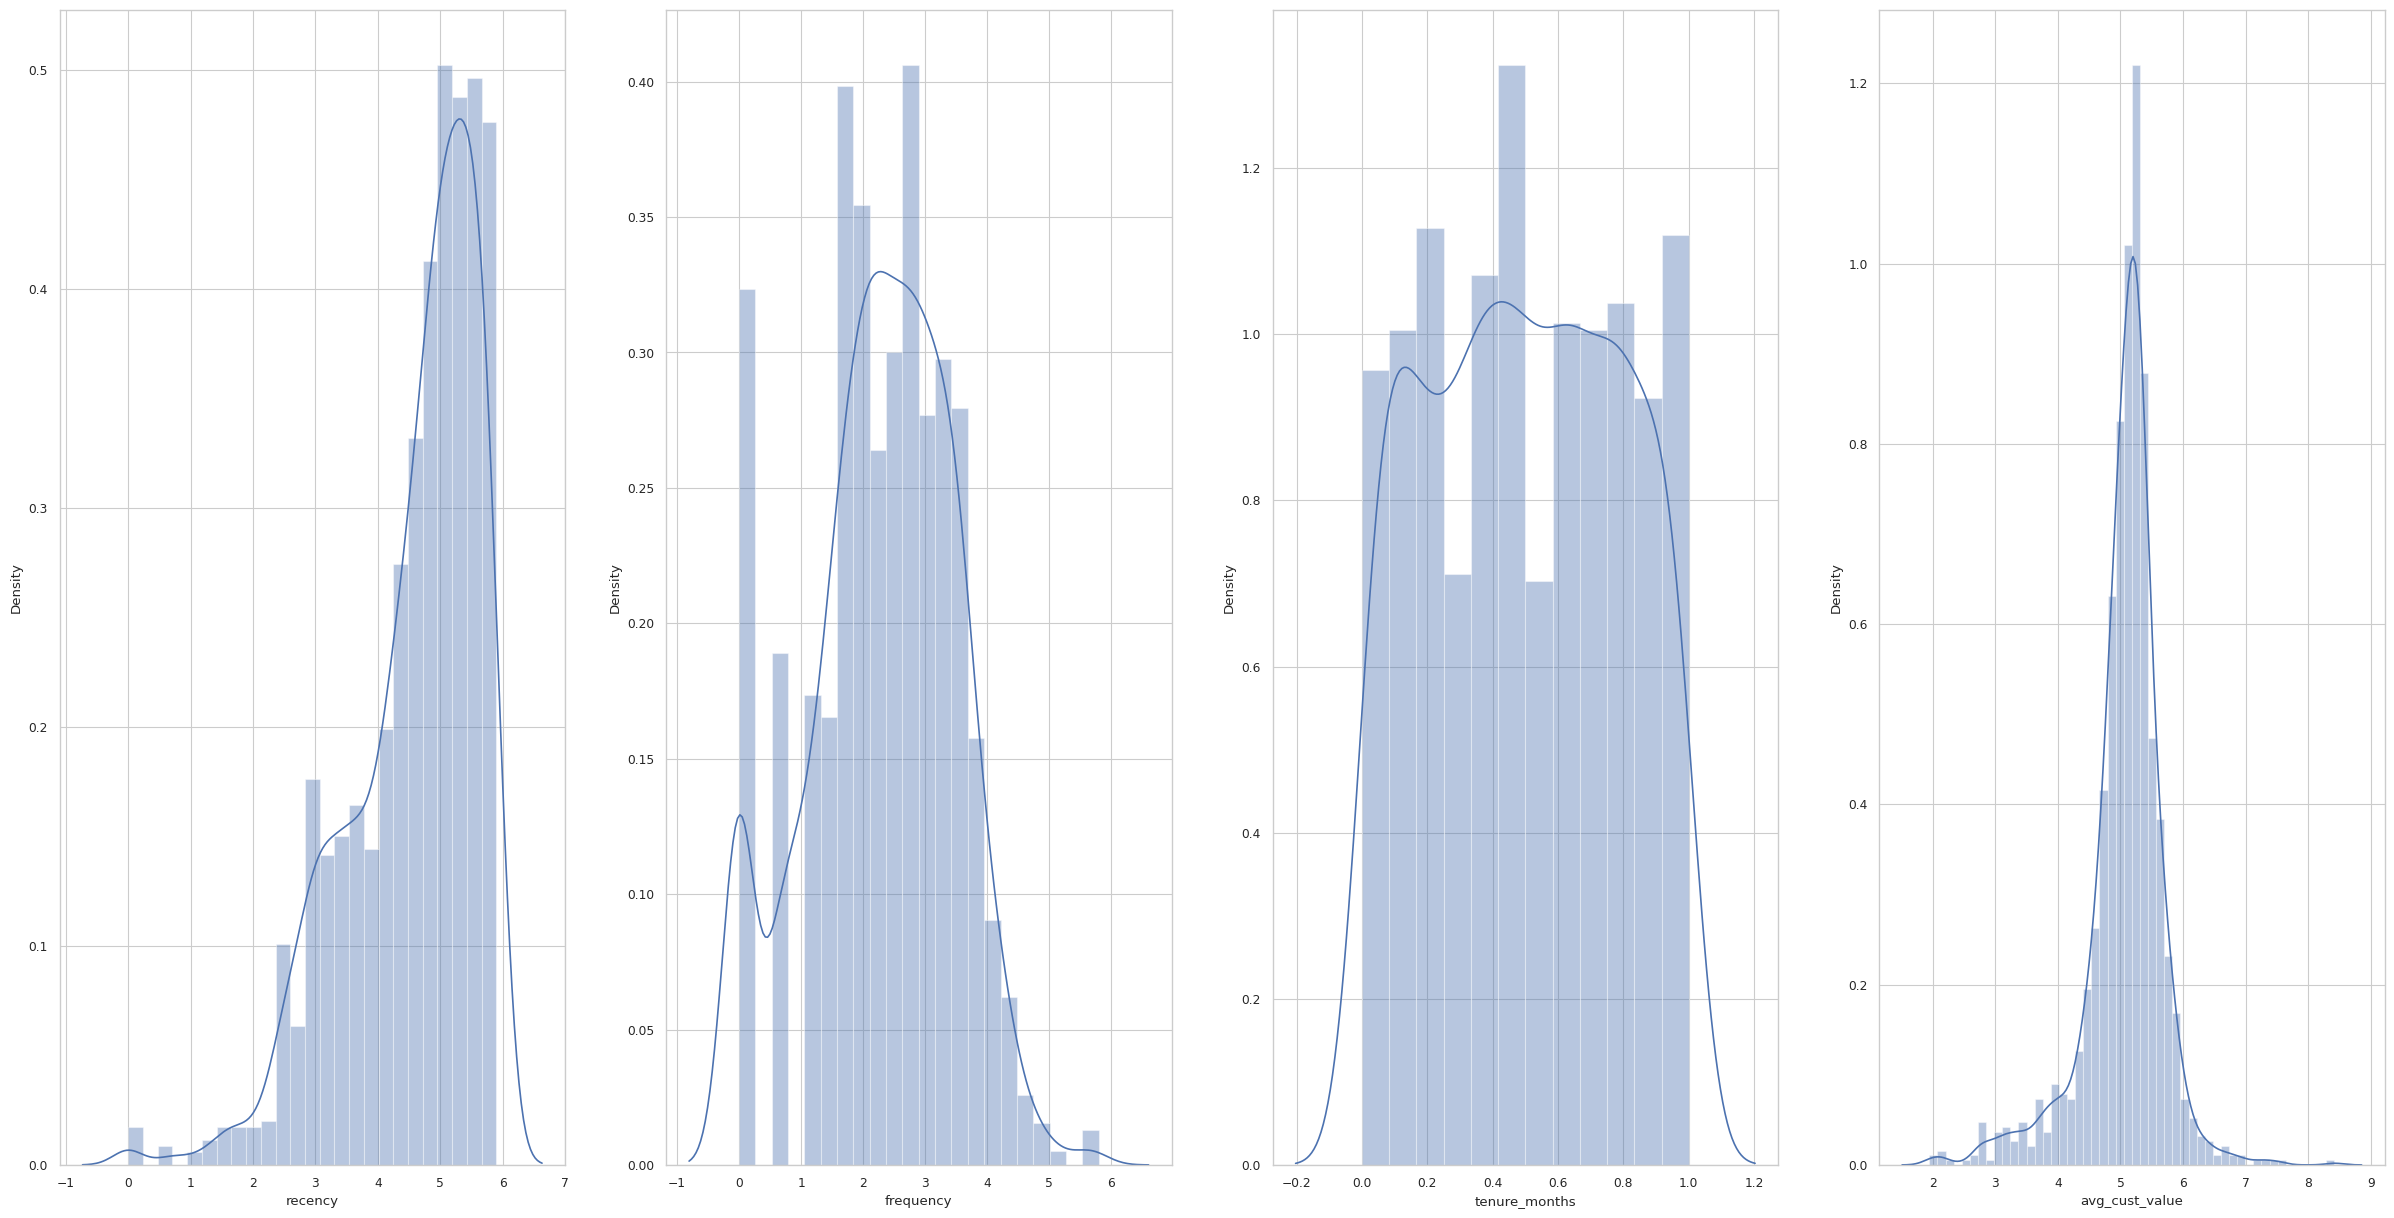

In [ ]:
# distribution of numerical features that have outlier values after transformation
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(30,15))
sns.set_context('paper', font_scale=1)

sns.distplot(df_ltv_group['recency'],kde='hist', ax=ax[0])

sns.distplot(df_ltv_group['frequency'], kde='hist',ax=ax[1])

sns.distplot(df_ltv_group['tenure_months'], kde='hist',ax=ax[2])

sns.distplot(df_ltv_group['avg_cust_value'], kde='hist',ax=ax[3])

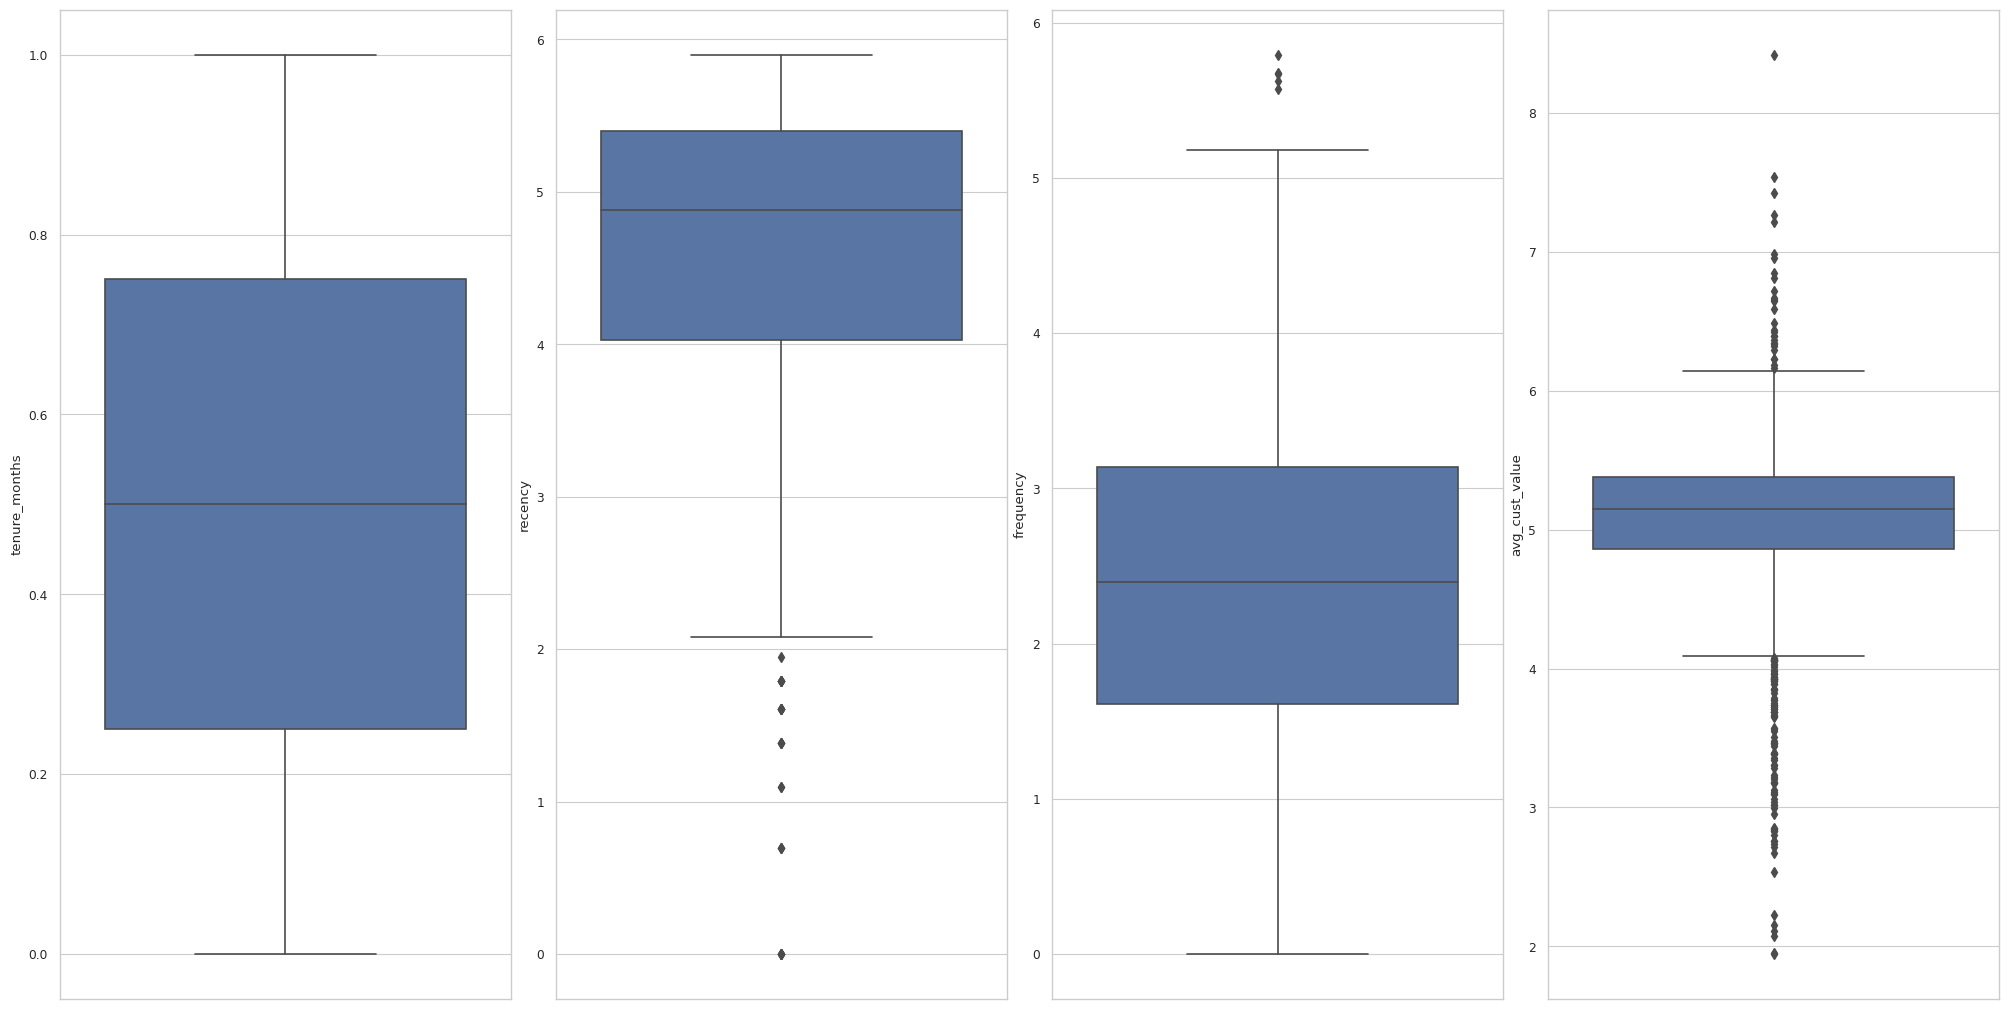

In [ ]:
# dataset that only consist numerical features beofre normalization
int_features = df_ltv_group[['tenure_months','recency', 'frequency','avg_cust_value']]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 4:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#describe numeric data value in df_ltv_group after normalization
df_desc = round(df_ltv_group.select_dtypes(include='number').describe(),2).T
df_desc

,count,mean,std,min,25%,50%,75%,max
tenure_months,1468.0,0.50,0.29,0.00,0.25,0.50,0.75,1.00
recency,1468.0,4.59,1.05,0.00,4.03,4.88,5.40,5.90
frequency,1468.0,2.30,1.16,0.00,1.61,2.40,3.14,5.79
avg_cust_value,1468.0,5.07,0.62,1.94,4.86,5.15,5.38,8.42


In [ ]:
df_ltv_group.head()

,customerid,gender,location,tenure_months,recency,frequency,avg_cust_value,cust_category
0,12346,F,New York,0.604167,4.682131,0.000000,5.164672,Low Value
1,12347,M,New York,0.375000,4.094345,3.433987,6.109559,High Value
2,12348,M,California,0.770833,4.304065,2.079442,5.350056,Medium Value
3,12350,M,California,0.479167,2.890372,2.397895,4.813322,Medium Value
4,12356,F,Chicago,0.604167,4.682131,2.564949,4.984223,Medium Value


In [ ]:
#encode data that have object data types into dummy variables
df_ltv_group[['gender','location','cust_category']] = df_ltv_group[['gender','location','cust_category']].apply(LabelEncoder().fit_transform)
df_ltv_group.head()

,customerid,gender,location,tenure_months,recency,frequency,avg_cust_value,cust_category
0,12346,0,3,0.604167,4.682131,0.000000,5.164672,1
1,12347,1,3,0.375000,4.094345,3.433987,6.109559,0
2,12348,1,0,0.770833,4.304065,2.079442,5.350056,2
3,12350,1,0,0.479167,2.890372,2.397895,4.813322,2
4,12356,0,1,0.604167,4.682131,2.564949,4.984223,2


In [ ]:
# Data Splitting
X = df_ltv_group.drop(columns=['cust_category'])
y = df_ltv_group['cust_category']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      1468 non-null   object 
 1   gender          1468 non-null   int64  
 2   location        1468 non-null   int64  
 3   tenure_months   1468 non-null   float64
 4   recency         1468 non-null   float64
 5   frequency       1468 non-null   float64
 6   avg_cust_value  1468 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 91.8+ KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 1468 entries, 0 to 1467
Series name: cust_category
Non-Null Count  Dtype
--------------  -----
1468 non-null   int64
dtypes: int64(1)
memory usage: 22.9 KB


<Axes: >

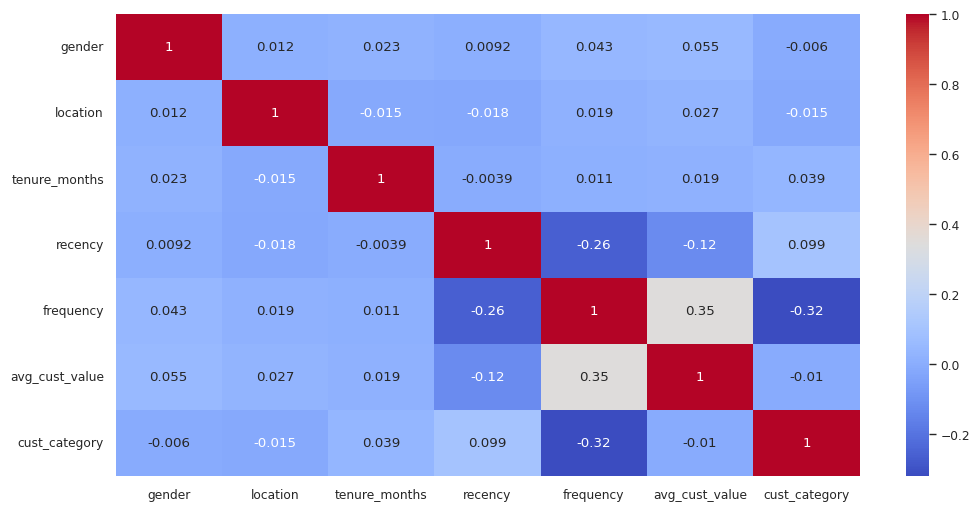

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_ltv_group.corr(), annot=True, cmap='coolwarm')

In [ ]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
round(featureScores.sort_values(by=['Score'], ascending=False).reset_index(drop=True),2)

The features that correlate well with target feature:



,Features,Score
0,frequency,616.62
1,customerid,394.62
2,avg_cust_value,34.29
3,recency,18.22
4,gender,2.00
5,location,1.24
6,tenure_months,0.51


In [ ]:
# Data Splitting
X_best = df_ltv_group[['frequency','avg_cust_value','recency']]
y_best = df_ltv_group['cust_category']

# Split Dataset into Data Training and Data Test
X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.2, random_state=42)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) in the training set only for minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hasil setelah oversampling
print("Jumlah kelas sebelum oversampling:\n", y_train.value_counts())
print("\nJumlah kelas setelah oversampling:\n", y_train_resampled.value_counts())

Jumlah kelas sebelum oversampling:
 2    579
1    301
0    294
Name: cust_category, dtype: int64

Jumlah kelas setelah oversampling:
 1    579
0    579
2    579
Name: cust_category, dtype: int64


In [ ]:
# # normalize features
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test = scaler.fit_transform(X_test)

#### **a. Logistic Regression Analysis**

In [ ]:
#train the model
log_model = LogisticRegression()

log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
# predict data train
y_train_pred_log = log_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train_resampled, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       579
           1       0.99      1.00      0.99       579
           2       1.00      0.96      0.98       579

    accuracy                           0.99      1737
   macro avg       0.99      0.99      0.99      1737
weighted avg       0.99      0.99      0.99      1737



In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       0.97      1.00      0.99        66
           2       1.00      0.97      0.99       155

    accuracy                           0.99       294
   macro avg       0.98      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [ ]:
acc_log_train=round(log_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 98.79
Test Accuracy: % 98.64


#### **b. Random Forest Classifier**

In [ ]:
# train the model
np.random.seed(42)
rf_model = RandomForestClassifier(random_state=42).fit(X_train_resampled, y_train_resampled)
print(rf_model)

RandomForestClassifier(random_state=42)


In [ ]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train_resampled, y_train_pred_rf))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       579
           1       1.00      1.00      1.00       579
           2       1.00      1.00      1.00       579

    accuracy                           1.00      1737
   macro avg       1.00      1.00      1.00      1737
weighted avg       1.00      1.00      1.00      1737



In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        73
           1       0.97      0.98      0.98        66
           2       0.96      0.98      0.97       155

    accuracy                           0.97       294
   macro avg       0.97      0.96      0.97       294
weighted avg       0.97      0.97      0.97       294



In [ ]:
acc_rf_train=round(rf_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 96.6


#### **c. Decision Tree**

In [ ]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)
print(dt_model)

DecisionTreeClassifier()


In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train_resampled, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       579
           1       1.00      1.00      1.00       579
           2       1.00      1.00      1.00       579

    accuracy                           1.00      1737
   macro avg       1.00      1.00      1.00      1737
weighted avg       1.00      1.00      1.00      1737



In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.98      0.97      0.98        66
           2       0.97      0.95      0.96       155

    accuracy                           0.96       294
   macro avg       0.96      0.96      0.96       294
weighted avg       0.96      0.96      0.96       294



In [ ]:
acc_dt_train=round(dt_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 95.92


#### **d. Gaussian Naive Bayes**

In [ ]:
# train the model
gnb_model = GaussianNB().fit(X_train_resampled, y_train_resampled)
print(gnb_model)

GaussianNB()


In [ ]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train_resampled, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       579
           1       0.92      0.90      0.91       579
           2       0.86      0.84      0.85       579

    accuracy                           0.90      1737
   macro avg       0.90      0.90      0.90      1737
weighted avg       0.90      0.90      0.90      1737



In [ ]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        73
           1       0.85      0.92      0.88        66
           2       0.95      0.86      0.90       155

    accuracy                           0.90       294
   macro avg       0.88      0.91      0.90       294
weighted avg       0.90      0.90      0.90       294



In [ ]:
acc_gnb_train=round(gnb_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_gnb_train))
print("Test Accuracy: % {}".format(acc_gnb_test))

Training Accuracy: % 89.58
Test Accuracy: % 89.8


In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.9879, 0.9864],["Gaussian Naive Bayes", 0.8958, 0.8980],
                       ["Decision Tree", 1, 0.9592],["Random Forest", 1, 0.9660]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"]).reset_index(drop=True)

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

,Models,Training Accuracy Score,Testing Accuracy Score
0,Random Forest,1.000000,0.966000
1,Decision Tree,1.000000,0.959200
2,Logistic Regression,0.987900,0.986400
3,Gaussian Naive Bayes,0.895800,0.898000


#### **e. Predicting Customer Purchase Category**

In [ ]:
pred_test = df_ltv_group[['frequency','avg_cust_value','recency']]
pred_test.head()

,frequency,avg_cust_value,recency
0,0.000000,5.164672,4.682131
1,3.433987,6.109559,4.094345
2,2.079442,5.350056,4.304065
3,2.397895,4.813322,2.890372
4,2.564949,4.984223,4.682131


In [ ]:
# lets predict!
predict = pd.Series(dt_model.predict(pred_test), name = 'cust_category').astype(int)
results = pd.concat([X['customerid'], predict],axis = 1)
results = results.rename(columns={'cust_category':'cust_category_pred'})
results.head()

,customerid,cust_category_pred
0,12346,1
1,12347,0
2,12348,2
3,12350,2
4,12356,2


In [ ]:
results_pred = results.groupby('cust_category_pred').agg(customer_cnt=('customerid','count')).reset_index()
print('Target Customer after predicted :')
results_pred

In [ ]:
df_pred = df_ltv_group.merge(results, how='left',on='customerid')

def cust_category(x):
  if x==0:
    return 'High Value'
  elif x==1:
    return 'Low Value'
  else:
    return 'Medium Value'
df_pred['cust_category_pred'] = df_pred['cust_category_pred'].apply(cust_category)
df_pred['cust_category'] = df_pred['cust_category'].apply(cust_category)
df_pred = df_pred.drop(columns='avg_cust_value')

df_pred[df_pred['cust_category']!=df_pred['cust_category_pred']].sort_values('cust_category').reset_index(drop=True)

In [ ]:
cust_transition = df_ltv_group[['customerid']].merge(df_pred[['customerid','cust_category','cust_category_pred']][df_pred['cust_category']!=df_pred['cust_category_pred']],how='right',on='customerid').sort_values('cust_category').reset_index(drop=True)
cust_transition

In [ ]:
#Data Visualization New Customer
plt.figure(figsize=(15,8))
plt.grid(False)
fig = sns.countplot(x='cust_category', data = df_pred, palette = 'Paired')


# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Customer Revenue Category (Before Predicted)\n in 2019', fontweight='bold', fontsize= 14, color='black')
plt.xlabel('Revenue Category', fontweight ='bold',fontsize=10)
plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)

In [ ]:
#Data Visualization New Customer
plt.figure(figsize=(15,8))
plt.grid(False)
fig = sns.countplot(x='cust_category_pred', data = df_pred, palette = 'Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Customer Revenue Category (After Predicted)\n in 2019', fontweight='bold', fontsize= 14, color='black')
plt.xlabel('Revenue Category', fontweight ='bold',fontsize=10)
plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)

## **5. Cross-Selling (Which products are selling together)**

**Market Basket Analysis by Product Category**

In [ ]:
basket = df_online_sales.groupby(['transaction_id', 'product_category'])['quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.025, use_colnames=True)

# Extract association rules
association_rules_category_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

In [ ]:
association_rules_category_df.sort_values('lift', ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
association_rules_category_df.sort_values('support', ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

In [ ]:
association_rules_category_df.sort_values('confidence', ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

**Market Basket Analysis by Product Description**

In [ ]:
basket = df_online_sales.groupby(['transaction_id', 'product_description'])['quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.0034, use_colnames=True)

# Extract association rules
association_rules_description_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

In [ ]:
association_rules_description_df.sort_values('lift', ascending=False).reset_index(drop=True).head(10).style.background_gradient(cmap='BuGn')

In [ ]:
association_rules_description_df.sort_values('support', ascending=False).reset_index(drop=True).head(10).style.background_gradient(cmap='BuGn')

In [ ]:
association_rules_description_df.sort_values('confidence', ascending=False).reset_index(drop=True).head(10).style.background_gradient(cmap='BuGn')

## **6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)**

For this, we need create dependent variable at customer level (average transaction days per for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [ ]:
#create df_next_purchase
df_next_purchase = df_online_sales.copy()
df_discount = df_disc_coupon.copy()
df_next_purchase['month'] = pd.to_datetime(df_next_purchase['transaction_date']).dt.to_period('M')


#merge df_next_purchase and df_tax_amt
df_next_purchase = df_next_purchase.merge(df_tax_amt, how='left',on='product_category')
df_next_purchase = df_next_purchase.merge(df_customer, how='left',on='customerid')

df_next_purchase = df_next_purchase.merge(df_discount, how='left', on=['month','product_category'])
df_next_purchase['coupon_code'] = df_next_purchase['coupon_code'].fillna('NO DISCOUNT')
df_next_purchase['discount_pct'] = df_next_purchase['discount_pct'].fillna(0)


#finalized discount percentage based on coupon_status
def cocokin_diskon(x):
  if 'Used' in x:
    return 1
  else:
    return 0

df_next_purchase['final_disc'] = df_next_purchase['coupon_status'].apply(cocokin_diskon)
df_next_purchase['discount_pct'] = df_next_purchase['discount_pct']*df_next_purchase['final_disc']
df_next_purchase = df_next_purchase.drop(columns='final_disc')

df_next_purchase['revenue'] = round(((df_next_purchase['quantity']*df_next_purchase['avg_price'])*(1-(df_next_purchase['discount_pct']/100))*(1 + df_next_purchase['gst'])) + df_next_purchase['delivery_charges'],2)
df_next_purchase.head()

In [ ]:
#inspect df_next_purchase
df_next_purchase.info()

In [ ]:
# #grouped df_rep_purchase by customerid and transaction_id
# df_rep_purchase = df_next_purchase.groupby(by=['customerid','transaction_id']).agg(qty=('quantity','sum'),
#                                                                                   revenue=('revenue','sum')).reset_index()
# df_rep_purchase.head(10)

#create df_cust_transaction
df_cust_transaction = df_next_purchase[['customerid','transaction_id']].drop_duplicates()
df_cust_transaction = df_cust_transaction.groupby('customerid').agg(transaction_unique_count=('transaction_id','count')).reset_index()
df_cust_transaction = df_cust_transaction[df_cust_transaction['transaction_unique_count']>1].sort_values('customerid').reset_index(drop=True)
df_cust_transaction

In [ ]:
# #create df_rep_purchase 0> groupby customerid
# df_rep_purchase = df_rep_purchase.groupby(by=['customerid']).filter(lambda x: len(x)>1)
# df_rep_purchase = df_rep_purchase[['customerid']]
# df_rep_purchase

#merge with df_next_purchase_date
df_cust_transaction = df_cust_transaction[['customerid']]
df_cust_transaction = df_cust_transaction.merge(df_next_purchase[['customerid','transaction_id','transaction_date']], how='left', on='customerid').sort_values(by=['customerid','transaction_date']).reset_index(drop=True)
df_cust_transaction = df_cust_transaction.drop_duplicates()
df_cust_transaction

In [ ]:
print('Total Customer that Purchase more than one time:',df_cust_transaction['customerid'].nunique())

In [ ]:
#create repeat pruchase -> groupby customerid
repeat_purchase = df_cust_transaction.groupby(by=['customerid'])['transaction_date'].apply(lambda x: x.diff().mean().days).reset_index()
repeat_purchase

In [ ]:
# Create the dependent variable by categorizing average days
repeat_purchase['np_category'] = pd.cut(repeat_purchase['transaction_date'], bins=[-1, 30, 60, 90, float('inf')], labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])
repeat_purchase = repeat_purchase.sort_values('transaction_date',ascending=True).reset_index(drop=True)
repeat_purchase

In [ ]:
#merge with df_next_purchase
df_next_purchase = df_next_purchase.merge(repeat_purchase[['customerid','np_category']],on='customerid', how = 'right')
df_next_purchase = df_next_purchase.rename(columns={'transaction_date_x':'transaction_date',
                                                    'transaction_date_y':'days_mean'})
df_next_purchase.head(20)

In [ ]:
df_next_purchase['customerid'].nunique()

In [ ]:
df_next_purchase.info()

In [ ]:
#check next purchase category
df_next_purchase['np_category'].unique()

In [ ]:
#create df_next_purchase_group
df_next_purchase_group = df_next_purchase.groupby(by=['customerid','gender','location']).agg(tenure_months=('tenure_months','max')).reset_index()

df_next_purchase_group.info()

In [ ]:
#merge with rfm and df_next_purchase
df_next_purchase_group = df_next_purchase_group.merge(rfm[['customerid','recency','frequency','avg_cust_value']], how='left',on='customerid')
df_next_purchase_group = df_next_purchase_group.merge(df_next_purchase[['customerid','np_category']].drop_duplicates(), how='left',on='customerid')

In [ ]:
df_next_purchase_group.info()

In [ ]:
df_next_purchase_group

In [ ]:
#Data Visualization New Customer
plt.figure(figsize=(15,8))
plt.grid(False)
fig = sns.countplot(x='np_category', data = df_next_purchase_group, palette = 'Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Customer Revenue Category in 2019', fontweight='bold', fontsize= 14, color='black')
plt.xlabel('Revenue Category', fontweight ='bold',fontsize=10)
plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)

In [ ]:
#describe numeric data value in df_next_purchase_group before normalization
round(df_next_purchase_group.select_dtypes(include='number').describe(),2).T

In [ ]:
#describe object data value in df_next_purchase_group
round(df_next_purchase_group.select_dtypes(include='object').describe(),2)

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_next_purchase_group.corr(), annot=True, cmap='coolwarm')

In [ ]:
# dataset that only consist numerical features beofre normalization
int_features = df_next_purchase_group[['tenure_months','recency', 'frequency','avg_cust_value']]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 4:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# distribution of numerical features that have outlier values before normalization
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(20,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_next_purchase_group['recency'],kde='hist', ax=ax[0])

sns.distplot(df_next_purchase_group['frequency'], kde='hist',ax=ax[1])

sns.distplot(df_next_purchase_group['tenure_months'], kde='hist',ax=ax[2])

sns.distplot(df_next_purchase_group['avg_cust_value'], kde='hist',ax=ax[3])

In [ ]:
#Perform Normalization (log transformasi)
df_next_purchase_group[['frequency','avg_cust_value']] = np.log(df_next_purchase_group[['frequency','avg_cust_value']])
df_next_purchase_group[['recency']] = np.log1p(df_next_purchase_group[['recency']])

In [ ]:
df_next_purchase_group['tenure_months'].min(), df_next_purchase_group['tenure_months'].max()

In [ ]:
#Perform MinMaxScaler() in revenue and recency
df_next_purchase_group['tenure_months'] = MinMaxScaler().fit_transform(df_next_purchase_group['tenure_months'].values.reshape(len(df_next_purchase_group), 1))

In [ ]:
df_next_purchase_group['tenure_months'].min(), df_next_purchase_group['tenure_months'].max()

In [ ]:
# dataset that only consist numerical features after normalization
int_features = df_next_purchase_group[['tenure_months','recency', 'frequency','avg_cust_value']]

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 4:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# distribution of numerical features that have outlier values after normalization
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(20,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_ltv_group['recency'],kde='hist', ax=ax[0])

sns.distplot(df_ltv_group['frequency'], kde='hist',ax=ax[1])

sns.distplot(df_ltv_group['tenure_months'], kde='hist',ax=ax[2])

sns.distplot(df_ltv_group['avg_cust_value'], kde='hist',ax=ax[3])

In [ ]:
#describe numeric data value in df_next_purchase_group ater normalization
round(df_next_purchase_group.select_dtypes(include='number').describe(),2).T

In [ ]:
#encode value that have object values
df_next_purchase_group[['gender','location','np_category']] = df_next_purchase_group[['gender','location','np_category']].apply(LabelEncoder().fit_transform)
df_next_purchase_group.head(10)

In [ ]:
# Data Splitting
X = df_next_purchase_group.drop(columns=['np_category'])
y = df_next_purchase_group['np_category']

In [ ]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
round(featureScores.sort_values(by=['Score'], ascending=False).reset_index(drop=True),2)

In [ ]:
# Data Splitting
X_best = df_next_purchase_group[['frequency','location','avg_cust_value','recency']]
y_best = df_next_purchase_group['np_category']

# Split Dataset into Data Training and Data Test
X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.2, random_state=42)

# Apply SMOTE (Synthetic Minority Over-sampling Technique) in the training set only for minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Hasil setelah oversampling
print("Jumlah kelas sebelum oversampling:\n", y_train.value_counts())
print("\nJumlah kelas setelah oversampling:\n", y_train_resampled.value_counts())

#### **a. Logistic Regression Model**

In [ ]:
# Inisialisasi model Regresi Logistik
log_model = LogisticRegression()

# train model
log_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# predict data train
y_train_pred_log = log_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train_resampled, y_train_pred_log))

In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

In [ ]:
acc_log_train=round(log_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

#### **b. Random Forest Classifier**

In [ ]:
# train the model
np.random.seed(42)
rf_model = RandomForestClassifier(random_state=42).fit(X_train_resampled, y_train_resampled)
print(rf_model)

In [ ]:
# predict data train
y_train_pred_rf = rf_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train_resampled, y_train_pred_rf))

In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

In [ ]:
acc_rf_train=round(rf_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

#### **c. Decision Tree**

In [ ]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)
print(dt_model)

In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train_resampled, y_train_pred_dt))

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

In [ ]:
acc_dt_train=round(dt_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

#### **d. Gaussian Naive Bayes**

In [ ]:
# train the model
gnb_model = GaussianNB().fit(X_train_resampled, y_train_resampled)
print(gnb_model)

In [ ]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train_resampled)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train_resampled, y_train_pred_gnb))

In [ ]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_gnb))

In [ ]:
acc_gnb_train=round(gnb_model.score(X_train_resampled,y_train_resampled)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_gnb_train))
print("Test Accuracy: % {}".format(acc_gnb_test))

In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.7036, 0.7621],["Gaussian Naive Bayes", 0.6751, 0.6877],
                       ["Decision Tree", 1, 0.9108],["Random Forest", 1, 0.9219]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"]).reset_index(drop=True)

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='BuGn')

#### **e. Predicting Customer Next Purchase Day Category**

In [ ]:
pred_test = df_next_purchase_group[['frequency','location','avg_cust_value','recency']]
pred_test.head()

In [ ]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name ='np_category').astype(int)
results = pd.concat([X['customerid'], predict],axis = 1)
results = results.rename(columns={'np_category':'cust_np_category_pred'})
results.head()

In [ ]:
results_pred = results.groupby('cust_np_category_pred').agg(customer_cnt=('customerid','count')).reset_index()
print('Next Day Purchase Category Customer after predicted :')
results_pred

In [ ]:
df_pred = df_next_purchase_group.merge(results, how='left',on='customerid')

def cust_category(x):
  if x==0:
    return '0-30 Days'
  elif x==1:
    return '30-60 Days'
  elif x==2:
    return '60-90 Days'
  else:
    return '90+ Days'
df_pred['cust_np_category_pred'] = df_pred['cust_np_category_pred'].apply(cust_category)
df_pred['np_category'] = df_pred['np_category'].apply(cust_category)
df_pred = df_pred.drop(columns='avg_cust_value')

df_pred[df_pred['np_category']!=df_pred['cust_np_category_pred']].reset_index(drop=True)

In [ ]:
cust_transition = df_next_purchase_group[['customerid']].merge(df_pred[['customerid','np_category','cust_np_category_pred']][df_pred['np_category']!=df_pred['cust_np_category_pred']],how='right',on='customerid').sort_values('np_category').reset_index(drop=True)
cust_transition

In [ ]:
#Data Visualization New Customer
plt.figure(figsize=(15,8))
plt.grid(False)
fig = sns.countplot(x='np_category', data = df_pred, palette = 'Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Customer Next Purchase Days Category (Before Predicted)\n in 2019', fontweight='bold', fontsize= 14, color='black')
plt.xlabel('Next Purchase Days Category', fontweight ='bold',fontsize=10)
plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)

In [ ]:
 #Data Visualization New Customer
plt.figure(figsize=(15,8))
plt.grid(False)
fig = sns.countplot(x='cust_np_category_pred', data = df_pred, palette = 'Paired')

# Add labels to the bars
ax = fig.axes
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Customer Next Purchase Days Category (After Predicted)\n in 2019', fontweight='bold', fontsize= 14, color='black')
plt.xlabel('Next Purchase Days Category', fontweight ='bold',fontsize=10)
plt.ylabel('Customer Count', fontweight = 'bold', fontsize=10)